**Д е р е в ь я р е ш е н и й и с л у ч а й н ы й л е с**

1 Деревья решений

Разберитесь в том , как устроен ваш датасет и какова постановка задачи . Сделайте необходимый препроцессинг данных ( удаление лишних признаков , кодирование категориальных признаков, логарифмирование целевой переменной,масштабирование) .

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-marketing-dataset/bank.csv


In [2]:
df = pd.read_csv("/kaggle/input/bank-marketing-dataset/bank.csv")
# Загружаем данные

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


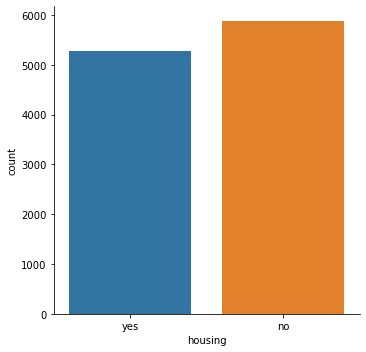

In [6]:
sns.catplot(x="housing", kind="count", data=df)

Это классический набор данных маркетингового банка, изначально загруженный в репозиторий машинного обучения UCI. Набор данных дает нам информацию о маркетинговой кампании финансового учреждения, которую нам нужно будет проанализировать, чтобы найти способы поиска будущих стратегий для улучшения будущих маркетинговых компаний для банка.

Целевая переменная deposit-принимает значения да или нет.

Задача классификации: выяснить, что клиент возьмет депозит.

In [7]:
df['deposit']

0        yes
1        yes
2        yes
3        yes
4        yes
        ... 
11157     no
11158     no
11159     no
11160     no
11161     no
Name: deposit, Length: 11162, dtype: object

In [8]:
df1 = pd.read_csv('/kaggle/input/bank-marketing-dataset/bank.csv')

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


Категориальные признаки переводим в бинарные

In [10]:
df1 = pd.get_dummies(df, columns=['job', 'education', 'marital', 'contact', 'poutcome', 'month', 'loan', 'housing', 'default'])
df1['deposit']=df['deposit'].map({'no':0,'yes':1})
df1.head()

,age,balance,day,duration,campaign,pdays,previous,deposit,job_admin.,job_blue-collar,...,month_may,month_nov,month_oct,month_sep,loan_no,loan_yes,housing_no,housing_yes,default_no,default_yes
0,59,2343,5,1042,1,-1,0,1,1,0,...,1,0,0,0,1,0,0,1,1,0
1,56,45,5,1467,1,-1,0,1,1,0,...,1,0,0,0,1,0,1,0,1,0
2,41,1270,5,1389,1,-1,0,1,0,0,...,1,0,0,0,1,0,0,1,1,0
3,55,2476,5,579,1,-1,0,1,0,0,...,1,0,0,0,1,0,0,1,1,0
4,54,184,5,673,2,-1,0,1,1,0,...,1,0,0,0,1,0,1,0,1,0


In [11]:
df2 = df1.drop(['deposit'], axis=1)

In [12]:
df2.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,loan_no,loan_yes,housing_no,housing_yes,default_no,default_yes
0,59,2343,5,1042,1,-1,0,1,0,0,...,1,0,0,0,1,0,0,1,1,0
1,56,45,5,1467,1,-1,0,1,0,0,...,1,0,0,0,1,0,1,0,1,0
2,41,1270,5,1389,1,-1,0,0,0,0,...,1,0,0,0,1,0,0,1,1,0
3,55,2476,5,579,1,-1,0,0,0,0,...,1,0,0,0,1,0,0,1,1,0
4,54,184,5,673,2,-1,0,1,0,0,...,1,0,0,0,1,0,1,0,1,0


In [13]:
from sklearn.model_selection import train_test_split

# Создание X, y
# X --- вся таблица без таргета
# y --- таргет (целевая переменная)
X=df1.drop('deposit', axis=1)
y =df1['deposit']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=12)

In [14]:
df1.head().T

,0,1,2,3,4
age,59,56,41,55,54
balance,2343,45,1270,2476,184
day,5,5,5,5,5
duration,1042,1467,1389,579,673
campaign,1,1,1,1,2
pdays,-1,-1,-1,-1,-1
previous,0,0,0,0,0
deposit,1,1,1,1,1
job_admin.,1,1,0,0,1
job_blue-collar,0,0,0,0,0


Разделим выборку

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y,
                                                      test_size=0.3, random_state=2019)

Обучаем Дерево Решений с максимальной глубиной 3 и параметром random_state=2019

In [16]:
# Обучение дерева решений
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth = 3, random_state = 2019)
tree.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=2019)

In [17]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file='tree.dot')
print(open('tree.dot').read()) 

digraph Tree {
node [shape=box] ;
0 [label="X[3] <= 203.5\ngini = 0.499\nsamples = 7813\nvalue = [4101, 3712]"] ;
1 [label="X[31] <= 0.5\ngini = 0.329\nsamples = 3112\nvalue = [2467, 645]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[40] <= 0.5\ngini = 0.274\nsamples = 2910\nvalue = [2433, 477]"] ;
1 -> 2 ;
3 [label="gini = 0.249\nsamples = 2832\nvalue = [2419, 413]"] ;
2 -> 3 ;
4 [label="gini = 0.295\nsamples = 78\nvalue = [14, 64]"] ;
2 -> 4 ;
5 [label="X[3] <= 68.0\ngini = 0.28\nsamples = 202\nvalue = [34, 168]"] ;
1 -> 5 ;
6 [label="gini = 0.219\nsamples = 8\nvalue = [7, 1]"] ;
5 -> 6 ;
7 [label="gini = 0.24\nsamples = 194\nvalue = [27, 167]"] ;
5 -> 7 ;
8 [label="X[3] <= 441.5\ngini = 0.454\nsamples = 4701\nvalue = [1634, 3067]"] ;
0 -> 8 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
9 [label="X[28] <= 0.5\ngini = 0.5\nsamples = 2481\nvalue = [1213, 1268]"] ;
8 -> 9 ;
10 [label="gini = 0.478\nsamples = 2061\nvalue = [815, 1246]"] ;
9 -> 1


Ссылка на изображение с кодом:
https://dreampuf.github.io/GraphvizOnline/#digraph%20Tree%20%7B%0D%0Anode%20%5Bshape%3Dbox%5D%20%3B%0D%0A0%20%5Blabel%3D%22X%5B3%5D%20%3C%3D%20203.5%5Cngini%20%3D%200.499%5Cnsamples%20%3D%207813%5Cnvalue%20%3D%20%5B4101%2C%203712%5D%22%5D%20%3B%0D%0A1%20%5Blabel%3D%22X%5B31%5D%20%3C%3D%200.5%5Cngini%20%3D%200.329%5Cnsamples%20%3D%203112%5Cnvalue%20%3D%20%5B2467%2C%20645%5D%22%5D%20%3B%0D%0A0%20-%3E%201%20%5Blabeldistance%3D2.5%2C%20labelangle%3D45%2C%20headlabel%3D%22True%22%5D%20%3B%0D%0A2%20%5Blabel%3D%22X%5B40%5D%20%3C%3D%200.5%5Cngini%20%3D%200.274%5Cnsamples%20%3D%202910%5Cnvalue%20%3D%20%5B2433%2C%20477%5D%22%5D%20%3B%0D%0A1%20-%3E%202%20%3B%0D%0A3%20%5Blabel%3D%22gini%20%3D%200.249%5Cnsamples%20%3D%202832%5Cnvalue%20%3D%20%5B2419%2C%20413%5D%22%5D%20%3B%0D%0A2%20-%3E%203%20%3B%0D%0A4%20%5Blabel%3D%22gini%20%3D%200.295%5Cnsamples%20%3D%2078%5Cnvalue%20%3D%20%5B14%2C%2064%5D%22%5D%20%3B%0D%0A2%20-%3E%204%20%3B%0D%0A5%20%5Blabel%3D%22X%5B3%5D%20%3C%3D%2068.0%5Cngini%20%3D%200.28%5Cnsamples%20%3D%20202%5Cnvalue%20%3D%20%5B34%2C%20168%5D%22%5D%20%3B%0D%0A1%20-%3E%205%20%3B%0D%0A6%20%5Blabel%3D%22gini%20%3D%200.219%5Cnsamples%20%3D%208%5Cnvalue%20%3D%20%5B7%2C%201%5D%22%5D%20%3B%0D%0A5%20-%3E%206%20%3B%0D%0A7%20%5Blabel%3D%22gini%20%3D%200.24%5Cnsamples%20%3D%20194%5Cnvalue%20%3D%20%5B27%2C%20167%5D%22%5D%20%3B%0D%0A5%20-%3E%207%20%3B%0D%0A8%20%5Blabel%3D%22X%5B3%5D%20%3C%3D%20441.5%5Cngini%20%3D%200.454%5Cnsamples%20%3D%204701%5Cnvalue%20%3D%20%5B1634%2C%203067%5D%22%5D%20%3B%0D%0A0%20-%3E%208%20%5Blabeldistance%3D2.5%2C%20labelangle%3D-45%2C%20headlabel%3D%22False%22%5D%20%3B%0D%0A9%20%5Blabel%3D%22X%5B28%5D%20%3C%3D%200.5%5Cngini%20%3D%200.5%5Cnsamples%20%3D%202481%5Cnvalue%20%3D%20%5B1213%2C%201268%5D%22%5D%20%3B%0D%0A8%20-%3E%209%20%3B%0D%0A10%20%5Blabel%3D%22gini%20%3D%200.478%5Cnsamples%20%3D%202061%5Cnvalue%20%3D%20%5B815%2C%201246%5D%22%5D%20%3B%0D%0A9%20-%3E%2010%20%3B%0D%0A11%20%5Blabel%3D%22gini%20%3D%200.099%5Cnsamples%20%3D%20420%5Cnvalue%20%3D%20%5B398%2C%2022%5D%22%5D%20%3B%0D%0A9%20-%3E%2011%20%3B%0D%0A12%20%5Blabel%3D%22X%5B3%5D%20%3C%3D%20649.5%5Cngini%20%3D%200.307%5Cnsamples%20%3D%202220%5Cnvalue%20%3D%20%5B421%2C%201799%5D%22%5D%20%3B%0D%0A8%20-%3E%2012%20%3B%0D%0A13%20%5Blabel%3D%22gini%20%3D%200.396%5Cnsamples%20%3D%20895%5Cnvalue%20%3D%20%5B243%2C%20652%5D%22%5D%20%3B%0D%0A12%20-%3E%2013%20%3B%0D%0A14%20%5Blabel%3D%22gini%20%3D%200.233%5Cnsamples%20%3D%201325%5Cnvalue%20%3D%20%5B178%2C%201147%5D%22%5D%20%3B%0D%0A12%20-%3E%2014%20%3B%0D%0A%7D

Вычисляем метрику accuracy на валидационном множестве.

In [18]:
from sklearn.metrics import accuracy_score
y_pred = tree.predict(X_valid)
accuracy_score(y_valid, y_pred)

0.7745595700209018

2 Настройка гиперпараметров дерева
1 . С о з д а й т е г е н е р а т о р р а з б и е н и й , к о т о р ы й п е р е м е ш и в а е т в ы б о р к у п е р е д с о з д а н и -
е м б л о к о в ( s h u f f l e = T r u e ) . Ч и с л о б л о к о в n _ s p l i t s р а в н о 5 . З а д а й т е т а к ж е
п а р а м е т р r a n d o m _ s t a t e д л я в о с п р о и з в о д и м о с т и р е з у л ь т а т о в . Н а п р и м е р :
k f = K F o l d ( n _ s p l i t s = 5 , s h u f f l e = T r u e , r a n d o m _ s t a t e = 4 2 )

In [19]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5, shuffle = True, random_state = 42)

2 . Осуществите кросс-валидацию модели для подборагиперпараметров:

In [20]:
from sklearn.model_selection import GridSearchCV
tree_params = {'max_depth': np.arange(2, 11),
               'min_samples_leaf': np.arange(2, 11)}

tree_grid = GridSearchCV(tree, tree_params, cv=5, scoring='accuracy') # кросс-валидация по 5 блокам
tree_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=3, random_state=2019),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])},
             scoring='accuracy')

In [21]:
best_tree = tree_grid.best_estimator_
y_pred = best_tree.predict(X_valid)
accuracy_score(y_valid, y_pred)

0.818751866228725

In [22]:
pd.DataFrame(tree_grid.cv_results_).T

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
mean_fit_time,0.017279,0.0164309,0.0166544,0.01668,0.0166295,0.01762,0.0189727,0.0176142,0.017908,0.0211739,...,0.0469128,0.0529061,0.0523675,0.0522956,0.051282,0.052768,0.0511364,0.0508259,0.0495759,0.0493646
std_fit_time,0.00128173,6.85988e-05,0.000234391,0.000165281,0.000194081,0.00158875,0.00219663,0.000864861,0.00110967,0.000138723,...,0.000712506,0.000375106,0.000645546,0.000283694,0.000369733,0.00145704,0.000769406,0.000704416,0.000490737,0.000711807
mean_score_time,0.00394192,0.00393686,0.00396614,0.00409932,0.00389643,0.00426903,0.00491457,0.00424442,0.00425892,0.00396504,...,0.00435505,0.00417943,0.00456095,0.00425072,0.004214,0.00432854,0.00426631,0.00431581,0.00420237,0.00416946
std_score_time,8.40243e-05,5.85026e-05,3.74812e-05,0.000210006,4.78307e-05,0.00059655,0.0007223,0.000459103,0.000517149,4.96883e-05,...,0.000139518,0.000128524,0.000697676,6.68532e-05,5.29528e-05,9.90524e-05,0.0001268,0.00011227,0.000117319,4.85058e-05
param_max_depth,2,2,2,2,2,2,2,2,2,3,...,9,10,10,10,10,10,10,10,10,10
param_min_samples_leaf,2,3,4,5,6,7,8,9,10,2,...,10,2,3,4,5,6,7,8,9,10
params,"{'max_depth': 2, 'min_samples_leaf': 2}","{'max_depth': 2, 'min_samples_leaf': 3}","{'max_depth': 2, 'min_samples_leaf': 4}","{'max_depth': 2, 'min_samples_leaf': 5}","{'max_depth': 2, 'min_samples_leaf': 6}","{'max_depth': 2, 'min_samples_leaf': 7}","{'max_depth': 2, 'min_samples_leaf': 8}","{'max_depth': 2, 'min_samples_leaf': 9}","{'max_depth': 2, 'min_samples_leaf': 10}","{'max_depth': 3, 'min_samples_leaf': 2}",...,"{'max_depth': 9, 'min_samples_leaf': 10}","{'max_depth': 10, 'min_samples_leaf': 2}","{'max_depth': 10, 'min_samples_leaf': 3}","{'max_depth': 10, 'min_samples_leaf': 4}","{'max_depth': 10, 'min_samples_leaf': 5}","{'max_depth': 10, 'min_samples_leaf': 6}","{'max_depth': 10, 'min_samples_leaf': 7}","{'max_depth': 10, 'min_samples_leaf': 8}","{'max_depth': 10, 'min_samples_leaf': 9}","{'max_depth': 10, 'min_samples_leaf': 10}"
split0_test_score,0.730006,0.730006,0.730006,0.730006,0.730006,0.730006,0.730006,0.730006,0.730006,0.78055,...,0.8119,0.802943,0.809341,0.809981,0.806782,0.806142,0.810621,0.81318,0.81382,0.808701
split1_test_score,0.769034,0.769034,0.769034,0.769034,0.769034,0.769034,0.769034,0.769034,0.769034,0.775432,...,0.806782,0.799744,0.803583,0.802943,0.801024,0.801663,0.806142,0.801663,0.801663,0.802303
split2_test_score,0.701855,0.701855,0.701855,0.701855,0.701855,0.701855,0.701855,0.701855,0.701855,0.767754,...,0.818938,0.806782,0.805502,0.808061,0.814459,0.816379,0.815099,0.815739,0.817019,0.820218


In [23]:

tree_params = {'max_depth': np.arange(2, 11),
               #'min_samples_leaf': np.arange(2, 11),
               #'min_samples_split':np.arange(2,11),
               #'max_features':np.arange(2,11)
              }

tree_grid_max_depth = GridSearchCV(tree, tree_params, cv=kf, scoring='accuracy')
tree_grid_max_depth.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(max_depth=3, random_state=2019),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])},
             scoring='accuracy')

<Figure size 432x288 with 0 Axes>

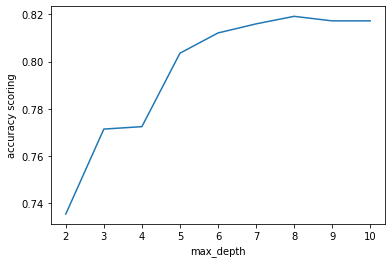

<Figure size 432x288 with 0 Axes>

In [24]:
end = pd.DataFrame(tree_grid_max_depth.cv_results_)
end.head().T
plt.plot(end['param_max_depth'], end['mean_test_score'])
plt.ylabel('accuracy scoring')
plt.xlabel('max_depth')
plt.figure()

In [25]:
tree_grid_max_depth.best_params_

{'max_depth': 8}

In [26]:
tree_grid_max_depth.best_estimator_

DecisionTreeClassifier(max_depth=8, random_state=2019)

In [27]:
tree_grid_max_depth.best_score_

0.8191476550807198

In [28]:
tree_params = {'max_depth': [9],
               'min_samples_leaf': np.arange(2, 11),
               #'min_samples_split':np.arange(2,11),
               #'max_features':np.arange(2,11)
              }
tree_grid_min_samples_leaf = GridSearchCV(tree, tree_params, cv=kf, scoring='accuracy')
tree_grid_min_samples_leaf.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(max_depth=3, random_state=2019),
             param_grid={'max_depth': [9],
                         'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])},
             scoring='accuracy')

<Figure size 432x288 with 0 Axes>

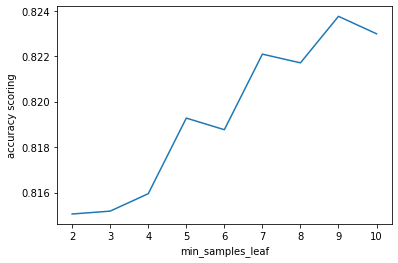

<Figure size 432x288 with 0 Axes>

In [29]:
end = pd.DataFrame(tree_grid_min_samples_leaf.cv_results_)
end.head().T
plt.plot(end['param_min_samples_leaf'], end['mean_test_score'])
plt.ylabel('accuracy scoring')
plt.xlabel('min_samples_leaf')
plt.figure()

In [30]:
tree_grid_min_samples_leaf.best_score_

0.8237577035527888

In [31]:
tree_grid_min_samples_leaf.best_estimator_

DecisionTreeClassifier(max_depth=9, min_samples_leaf=9, random_state=2019)

In [32]:
tree_grid_min_samples_leaf.best_params_

{'max_depth': 9, 'min_samples_leaf': 9}

In [33]:
tree_params = {'max_depth': [9],
               'min_samples_leaf': [3],
                'min_samples_split':np.arange(2,21)
              }
tree_grid_min_samples_split = GridSearchCV(tree, tree_params, cv=kf, scoring='accuracy') 
tree_grid_min_samples_split.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(max_depth=3, random_state=2019),
             param_grid={'max_depth': [9], 'min_samples_leaf': [3],
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20])},
             scoring='accuracy')

<Figure size 432x288 with 0 Axes>

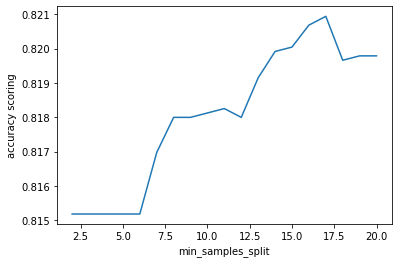

<Figure size 432x288 with 0 Axes>

In [34]:
end = pd.DataFrame(tree_grid_min_samples_split.cv_results_)
end.head()
plt.plot(end['param_min_samples_split'], end['mean_test_score'])
plt.ylabel('accuracy scoring')
plt.xlabel('min_samples_split')
plt.figure()

In [35]:
tree_grid_min_samples_split.best_params_

{'max_depth': 9, 'min_samples_leaf': 3, 'min_samples_split': 17}

In [36]:
tree_grid_min_samples_split.best_estimator_

DecisionTreeClassifier(max_depth=9, min_samples_leaf=3, min_samples_split=17,
                       random_state=2019)

In [37]:
tree_grid_min_samples_split.best_score_

0.8209402287042794

In [38]:
tree_params = {'max_depth': [9],
               'min_samples_leaf': [3],
               'min_samples_split': [11],
               'max_features': np.arange(1, X.shape[1])
              }
tree_grid_max_features = GridSearchCV(tree, tree_params, cv=kf, scoring='accuracy') 
tree_grid_max_features.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(max_depth=3, random_state=2019),
             param_grid={'max_depth': [9],
                         'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
                         'min_samples_leaf': [3], 'min_samples_split': [11]},
             scoring='accuracy')

<Figure size 432x288 with 0 Axes>

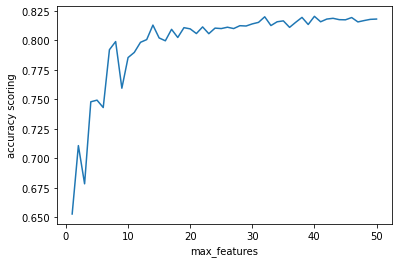

<Figure size 432x288 with 0 Axes>

In [39]:
end = pd.DataFrame(tree_grid_max_features.cv_results_)
end.head().T
plt.plot(end['param_max_features'], end['mean_test_score'])
plt.ylabel('accuracy scoring')
plt.xlabel('max_features')
plt.figure()

In [40]:
tree_grid_max_features.best_params_

{'max_depth': 9,
 'max_features': 40,
 'min_samples_leaf': 3,
 'min_samples_split': 11}

In [41]:
tree_grid_max_features.best_estimator_

DecisionTreeClassifier(max_depth=9, max_features=40, min_samples_leaf=3,
                       min_samples_split=11, random_state=2019)

In [42]:
tree_grid_max_features.best_score_

0.8204287201719008

> max_depth=9, max_features=40, min_samples_leaf=3, min_samples_split=11.

4 . Постройте графически полученнoе дерево. Оцените важность признаков с помощью атрибута feature_importances_.

In [43]:
best_tree_max_depth = tree_grid_max_depth.best_estimator_
y_pred = best_tree_max_depth.predict(X_valid)
accuracy_score(y_valid, y_pred)

0.8154673036727381

In [44]:
export_graphviz(best_tree_max_depth, out_file='tree.dot')
print(open('tree.dot').read()) 

digraph Tree {
node [shape=box] ;
0 [label="X[3] <= 203.5\ngini = 0.499\nsamples = 7813\nvalue = [4101, 3712]"] ;
1 [label="X[31] <= 0.5\ngini = 0.329\nsamples = 3112\nvalue = [2467, 645]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[40] <= 0.5\ngini = 0.274\nsamples = 2910\nvalue = [2433, 477]"] ;
1 -> 2 ;
3 [label="X[43] <= 0.5\ngini = 0.249\nsamples = 2832\nvalue = [2419, 413]"] ;
2 -> 3 ;
4 [label="X[3] <= 123.5\ngini = 0.228\nsamples = 2755\nvalue = [2394, 361]"] ;
3 -> 4 ;
5 [label="X[36] <= 0.5\ngini = 0.111\nsamples = 1524\nvalue = [1434, 90]"] ;
4 -> 5 ;
6 [label="X[33] <= 0.5\ngini = 0.087\nsamples = 1421\nvalue = [1356, 65]"] ;
5 -> 6 ;
7 [label="X[44] <= 0.5\ngini = 0.066\nsamples = 1343\nvalue = [1297, 46]"] ;
6 -> 7 ;
8 [label="gini = 0.057\nsamples = 1324\nvalue = [1285, 39]"] ;
7 -> 8 ;
9 [label="gini = 0.465\nsamples = 19\nvalue = [12, 7]"] ;
7 -> 9 ;
10 [label="X[47] <= 0.5\ngini = 0.369\nsamples = 78\nvalue = [59, 19]"] ;
6 -> 10 ;
11 

Ссылка на изображение с кодом: https://dreampuf.github.io/GraphvizOnline/#digraph%20Tree%20%7B%0D%0Anode%20%5Bshape%3Dbox%5D%20%3B%0D%0A0%20%5Blabel%3D%22X%5B3%5D%20%3C%3D%20203.5%5Cngini%20%3D%200.499%5Cnsamples%20%3D%207813%5Cnvalue%20%3D%20%5B4101%2C%203712%5D%22%5D%20%3B%0D%0A1%20%5Blabel%3D%22X%5B31%5D%20%3C%3D%200.5%5Cngini%20%3D%200.329%5Cnsamples%20%3D%203112%5Cnvalue%20%3D%20%5B2467%2C%20645%5D%22%5D%20%3B%0D%0A0%20-%3E%201%20%5Blabeldistance%3D2.5%2C%20labelangle%3D45%2C%20headlabel%3D%22True%22%5D%20%3B%0D%0A2%20%5Blabel%3D%22X%5B40%5D%20%3C%3D%200.5%5Cngini%20%3D%200.274%5Cnsamples%20%3D%202910%5Cnvalue%20%3D%20%5B2433%2C%20477%5D%22%5D%20%3B%0D%0A1%20-%3E%202%20%3B%0D%0A3%20%5Blabel%3D%22X%5B43%5D%20%3C%3D%200.5%5Cngini%20%3D%200.249%5Cnsamples%20%3D%202832%5Cnvalue%20%3D%20%5B2419%2C%20413%5D%22%5D%20%3B%0D%0A2%20-%3E%203%20%3B%0D%0A4%20%5Blabel%3D%22X%5B3%5D%20%3C%3D%20123.5%5Cngini%20%3D%200.228%5Cnsamples%20%3D%202755%5Cnvalue%20%3D%20%5B2394%2C%20361%5D%22%5D%20%3B%0D%0A3%20-%3E%204%20%3B%0D%0A5%20%5Blabel%3D%22X%5B36%5D%20%3C%3D%200.5%5Cngini%20%3D%200.111%5Cnsamples%20%3D%201524%5Cnvalue%20%3D%20%5B1434%2C%2090%5D%22%5D%20%3B%0D%0A4%20-%3E%205%20%3B%0D%0A6%20%5Blabel%3D%22X%5B33%5D%20%3C%3D%200.5%5Cngini%20%3D%200.087%5Cnsamples%20%3D%201421%5Cnvalue%20%3D%20%5B1356%2C%2065%5D%22%5D%20%3B%0D%0A5%20-%3E%206%20%3B%0D%0A7%20%5Blabel%3D%22X%5B44%5D%20%3C%3D%200.5%5Cngini%20%3D%200.066%5Cnsamples%20%3D%201343%5Cnvalue%20%3D%20%5B1297%2C%2046%5D%22%5D%20%3B%0D%0A6%20-%3E%207%20%3B%0D%0A8%20%5Blabel%3D%22gini%20%3D%200.057%5Cnsamples%20%3D%201324%5Cnvalue%20%3D%20%5B1285%2C%2039%5D%22%5D%20%3B%0D%0A7%20-%3E%208%20%3B%0D%0A9%20%5Blabel%3D%22gini%20%3D%200.465%5Cnsamples%20%3D%2019%5Cnvalue%20%3D%20%5B12%2C%207%5D%22%5D%20%3B%0D%0A7%20-%3E%209%20%3B%0D%0A10%20%5Blabel%3D%22X%5B47%5D%20%3C%3D%200.5%5Cngini%20%3D%200.369%5Cnsamples%20%3D%2078%5Cnvalue%20%3D%20%5B59%2C%2019%5D%22%5D%20%3B%0D%0A6%20-%3E%2010%20%3B%0D%0A11%20%5Blabel%3D%22gini%20%3D%200.15%5Cnsamples%20%3D%2049%5Cnvalue%20%3D%20%5B45%2C%204%5D%22%5D%20%3B%0D%0A10%20-%3E%2011%20%3B%0D%0A12%20%5Blabel%3D%22gini%20%3D%200.499%5Cnsamples%20%3D%2029%5Cnvalue%20%3D%20%5B14%2C%2015%5D%22%5D%20%3B%0D%0A10%20-%3E%2012%20%3B%0D%0A13%20%5Blabel%3D%22X%5B2%5D%20%3C%3D%209.5%5Cngini%20%3D%200.368%5Cnsamples%20%3D%20103%5Cnvalue%20%3D%20%5B78%2C%2025%5D%22%5D%20%3B%0D%0A5%20-%3E%2013%20%3B%0D%0A14%20%5Blabel%3D%22X%5B1%5D%20%3C%3D%20-16.0%5Cngini%20%3D%200.075%5Cnsamples%20%3D%2077%5Cnvalue%20%3D%20%5B74%2C%203%5D%22%5D%20%3B%0D%0A13%20-%3E%2014%20%3B%0D%0A15%20%5Blabel%3D%22gini%20%3D%200.444%5Cnsamples%20%3D%203%5Cnvalue%20%3D%20%5B2%2C%201%5D%22%5D%20%3B%0D%0A14%20-%3E%2015%20%3B%0D%0A16%20%5Blabel%3D%22gini%20%3D%200.053%5Cnsamples%20%3D%2074%5Cnvalue%20%3D%20%5B72%2C%202%5D%22%5D%20%3B%0D%0A14%20-%3E%2016%20%3B%0D%0A17%20%5Blabel%3D%22X%5B3%5D%20%3C%3D%2063.0%5Cngini%20%3D%200.26%5Cnsamples%20%3D%2026%5Cnvalue%20%3D%20%5B4%2C%2022%5D%22%5D%20%3B%0D%0A13%20-%3E%2017%20%3B%0D%0A18%20%5Blabel%3D%22gini%20%3D%200.375%5Cnsamples%20%3D%204%5Cnvalue%20%3D%20%5B3%2C%201%5D%22%5D%20%3B%0D%0A17%20-%3E%2018%20%3B%0D%0A19%20%5Blabel%3D%22gini%20%3D%200.087%5Cnsamples%20%3D%2022%5Cnvalue%20%3D%20%5B1%2C%2021%5D%22%5D%20%3B%0D%0A17%20-%3E%2019%20%3B%0D%0A20%20%5Blabel%3D%22X%5B47%5D%20%3C%3D%200.5%5Cngini%20%3D%200.343%5Cnsamples%20%3D%201231%5Cnvalue%20%3D%20%5B960%2C%20271%5D%22%5D%20%3B%0D%0A4%20-%3E%2020%20%3B%0D%0A21%20%5Blabel%3D%22X%5B41%5D%20%3C%3D%200.5%5Cngini%20%3D%200.171%5Cnsamples%20%3D%20615%5Cnvalue%20%3D%20%5B557%2C%2058%5D%22%5D%20%3B%0D%0A20%20-%3E%2021%20%3B%0D%0A22%20%5Blabel%3D%22X%5B44%5D%20%3C%3D%200.5%5Cngini%20%3D%200.286%5Cnsamples%20%3D%20307%5Cnvalue%20%3D%20%5B254%2C%2053%5D%22%5D%20%3B%0D%0A21%20-%3E%2022%20%3B%0D%0A23%20%5Blabel%3D%22gini%20%3D%200.268%5Cnsamples%20%3D%20301%5Cnvalue%20%3D%20%5B253%2C%2048%5D%22%5D%20%3B%0D%0A22%20-%3E%2023%20%3B%0D%0A24%20%5Blabel%3D%22gini%20%3D%200.278%5Cnsamples%20%3D%206%5Cnvalue%20%3D%20%5B1%2C%205%5D%22%5D%20%3B%0D%0A22%20-%3E%2024%20%3B%0D%0A25%20%5Blabel%3D%22X%5B1%5D%20%3C%3D%2010624.5%5Cngini%20%3D%200.032%5Cnsamples%20%3D%20308%5Cnvalue%20%3D%20%5B303%2C%205%5D%22%5D%20%3B%0D%0A21%20-%3E%2025%20%3B%0D%0A26%20%5Blabel%3D%22gini%20%3D%200.026%5Cnsamples%20%3D%20306%5Cnvalue%20%3D%20%5B302%2C%204%5D%22%5D%20%3B%0D%0A25%20-%3E%2026%20%3B%0D%0A27%20%5Blabel%3D%22gini%20%3D%200.5%5Cnsamples%20%3D%202%5Cnvalue%20%3D%20%5B1%2C%201%5D%22%5D%20%3B%0D%0A25%20-%3E%2027%20%3B%0D%0A28%20%5Blabel%3D%22X%5B33%5D%20%3C%3D%200.5%5Cngini%20%3D%200.452%5Cnsamples%20%3D%20616%5Cnvalue%20%3D%20%5B403%2C%20213%5D%22%5D%20%3B%0D%0A20%20-%3E%2028%20%3B%0D%0A29%20%5Blabel%3D%22X%5B5%5D%20%3C%3D%2032.0%5Cngini%20%3D%200.415%5Cnsamples%20%3D%20549%5Cnvalue%20%3D%20%5B388%2C%20161%5D%22%5D%20%3B%0D%0A28%20-%3E%2029%20%3B%0D%0A30%20%5Blabel%3D%22gini%20%3D%200.357%5Cnsamples%20%3D%20468%5Cnvalue%20%3D%20%5B359%2C%20109%5D%22%5D%20%3B%0D%0A29%20-%3E%2030%20%3B%0D%0A31%20%5Blabel%3D%22gini%20%3D%200.46%5Cnsamples%20%3D%2081%5Cnvalue%20%3D%20%5B29%2C%2052%5D%22%5D%20%3B%0D%0A29%20-%3E%2031%20%3B%0D%0A32%20%5Blabel%3D%22X%5B2%5D%20%3C%3D%2029.0%5Cngini%20%3D%200.348%5Cnsamples%20%3D%2067%5Cnvalue%20%3D%20%5B15%2C%2052%5D%22%5D%20%3B%0D%0A28%20-%3E%2032%20%3B%0D%0A33%20%5Blabel%3D%22gini%20%3D%200.278%5Cnsamples%20%3D%2060%5Cnvalue%20%3D%20%5B10%2C%2050%5D%22%5D%20%3B%0D%0A32%20-%3E%2033%20%3B%0D%0A34%20%5Blabel%3D%22gini%20%3D%200.408%5Cnsamples%20%3D%207%5Cnvalue%20%3D%20%5B5%2C%202%5D%22%5D%20%3B%0D%0A32%20-%3E%2034%20%3B%0D%0A35%20%5Blabel%3D%22X%5B2%5D%20%3C%3D%2020.5%5Cngini%20%3D%200.439%5Cnsamples%20%3D%2077%5Cnvalue%20%3D%20%5B25%2C%2052%5D%22%5D%20%3B%0D%0A3%20-%3E%2035%20%3B%0D%0A36%20%5Blabel%3D%22X%5B3%5D%20%3C%3D%20129.5%5Cngini%20%3D%200.489%5Cnsamples%20%3D%2033%5Cnvalue%20%3D%20%5B19%2C%2014%5D%22%5D%20%3B%0D%0A35%20-%3E%2036%20%3B%0D%0A37%20%5Blabel%3D%22X%5B0%5D%20%3C%3D%2046.0%5Cngini%20%3D%200.346%5Cnsamples%20%3D%2018%5Cnvalue%20%3D%20%5B14%2C%204%5D%22%5D%20%3B%0D%0A36%20-%3E%2037%20%3B%0D%0A38%20%5Blabel%3D%22gini%20%3D%200.0%5Cnsamples%20%3D%2010%5Cnvalue%20%3D%20%5B10%2C%200%5D%22%5D%20%3B%0D%0A37%20-%3E%2038%20%3B%0D%0A39%20%5Blabel%3D%22X%5B0%5D%20%3C%3D%2059.5%5Cngini%20%3D%200.5%5Cnsamples%20%3D%208%5Cnvalue%20%3D%20%5B4%2C%204%5D%22%5D%20%3B%0D%0A37%20-%3E%2039%20%3B%0D%0A40%20%5Blabel%3D%22gini%20%3D%200.32%5Cnsamples%20%3D%205%5Cnvalue%20%3D%20%5B1%2C%204%5D%22%5D%20%3B%0D%0A39%20-%3E%2040%20%3B%0D%0A41%20%5Blabel%3D%22gini%20%3D%200.0%5Cnsamples%20%3D%203%5Cnvalue%20%3D%20%5B3%2C%200%5D%22%5D%20%3B%0D%0A39%20-%3E%2041%20%3B%0D%0A42%20%5Blabel%3D%22X%5B1%5D%20%3C%3D%202159.0%5Cngini%20%3D%200.444%5Cnsamples%20%3D%2015%5Cnvalue%20%3D%20%5B5%2C%2010%5D%22%5D%20%3B%0D%0A36%20-%3E%2042%20%3B%0D%0A43%20%5Blabel%3D%22X%5B3%5D%20%3C%3D%20138.5%5Cngini%20%3D%200.469%5Cnsamples%20%3D%208%5Cnvalue%20%3D%20%5B5%2C%203%5D%22%5D%20%3B%0D%0A42%20-%3E%2043%20%3B%0D%0A44%20%5Blabel%3D%22gini%20%3D%200.375%5Cnsamples%20%3D%204%5Cnvalue%20%3D%20%5B1%2C%203%5D%22%5D%20%3B%0D%0A43%20-%3E%2044%20%3B%0D%0A45%20%5Blabel%3D%22gini%20%3D%200.0%5Cnsamples%20%3D%204%5Cnvalue%20%3D%20%5B4%2C%200%5D%22%5D%20%3B%0D%0A43%20-%3E%2045%20%3B%0D%0A46%20%5Blabel%3D%22gini%20%3D%200.0%5Cnsamples%20%3D%207%5Cnvalue%20%3D%20%5B0%2C%207%5D%22%5D%20%3B%0D%0A42%20-%3E%2046%20%3B%0D%0A47%20%5Blabel%3D%22X%5B4%5D%20%3C%3D%201.5%5Cngini%20%3D%200.236%5Cnsamples%20%3D%2044%5Cnvalue%20%3D%20%5B6%2C%2038%5D%22%5D%20%3B%0D%0A35%20-%3E%2047%20%3B%0D%0A48%20%5Blabel%3D%22X%5B3%5D%20%3C%3D%20108.5%5Cngini%20%3D%200.061%5Cnsamples%20%3D%2032%5Cnvalue%20%3D%20%5B1%2C%2031%5D%22%5D%20%3B%0D%0A47%20-%3E%2048%20%3B%0D%0A49%20%5Blabel%3D%22X%5B21%5D%20%3C%3D%200.5%5Cngini%20%3D%200.32%5Cnsamples%20%3D%205%5Cnvalue%20%3D%20%5B1%2C%204%5D%22%5D%20%3B%0D%0A48%20-%3E%2049%20%3B%0D%0A50%20%5Blabel%3D%22gini%20%3D%200.0%5Cnsamples%20%3D%204%5Cnvalue%20%3D%20%5B0%2C%204%5D%22%5D%20%3B%0D%0A49%20-%3E%2050%20%3B%0D%0A51%20%5Blabel%3D%22gini%20%3D%200.0%5Cnsamples%20%3D%201%5Cnvalue%20%3D%20%5B1%2C%200%5D%22%5D%20%3B%0D%0A49%20-%3E%2051%20%3B%0D%0A52%20%5Blabel%3D%22gini%20%3D%200.0%5Cnsamples%20%3D%2027%5Cnvalue%20%3D%20%5B0%2C%2027%5D%22%5D%20%3B%0D%0A48%20-%3E%2052%20%3B%0D%0A53%20%5Blabel%3D%22X%5B1%5D%20%3C%3D%203845.5%5Cngini%20%3D%200.486%5Cnsamples%20%3D%2012%5Cnvalue%20%3D%20%5B5%2C%207%5D%22%5D%20%3B%0D%0A47%20-%3E%2053%20%3B%0D%0A54%20%5Blabel%3D%22X%5B1%5D%20%3C%3D%201637.5%5Cngini%20%3D%200.42%5Cnsamples%20%3D%2010%5Cnvalue%20%3D%20%5B3%2C%207%5D%22%5D%20%3B%0D%0A53%20-%3E%2054%20%3B%0D%0A55%20%5Blabel%3D%22gini%20%3D%200.5%5Cnsamples%20%3D%206%5Cnvalue%20%3D%20%5B3%2C%203%5D%22%5D%20%3B%0D%0A54%20-%3E%2055%20%3B%0D%0A56%20%5Blabel%3D%22gini%20%3D%200.0%5Cnsamples%20%3D%204%5Cnvalue%20%3D%20%5B0%2C%204%5D%22%5D%20%3B%0D%0A54%20-%3E%2056%20%3B%0D%0A57%20%5Blabel%3D%22gini%20%3D%200.0%5Cnsamples%20%3D%202%5Cnvalue%20%3D%20%5B2%2C%200%5D%22%5D%20%3B%0D%0A53%20-%3E%2057%20%3B%0D%0A58%20%5Blabel%3D%22X%5B4%5D%20%3C%3D%205.5%5Cngini%20%3D%200.295%5Cnsamples%20%3D%2078%5Cnvalue%20%3D%20%5B14%2C%2064%5D%22%5D%20%3B%0D%0A2%20-%3E%2058%20%3B%0D%0A59%20%5Blabel%3D%22X%5B0%5D%20%3C%3D%2026.5%5Cngini%20%3D%200.236%5Cnsamples%20%3D%2073%5Cnvalue%20%3D%20%5B10%2C%2063%5D%22%5D%20%3B%0D%0A58%20-%3E%2059%20%3B%0D%0A60%20%5Blabel%3D%22X%5B3%5D%20%3C%3D%2094.0%5Cngini%20%3D%200.444%5Cnsamples%20%3D%206%5Cnvalue%20%3D%20%5B4%2C%202%5D%22%5D%20%3B%0D%0A59%20-%3E%2060%20%3B%0D%0A61%20%5Blabel%3D%22gini%20%3D%200.0%5Cnsamples%20%3D%203%5Cnvalue%20%3D%20%5B3%2C%200%5D%22%5D%20%3B%0D%0A60%20-%3E%2061%20%3B%0D%0A62%20%5Blabel%3D%22X%5B3%5D%20%3C%3D%20133.5%5Cngini%20%3D%200.444%5Cnsamples%20%3D%203%5Cnvalue%20%3D%20%5B1%2C%202%5D%22%5D%20%3B%0D%0A60%20-%3E%2062%20%3B%0D%0A63%20%5Blabel%3D%22gini%20%3D%200.0%5Cnsamples%20%3D%202%5Cnvalue%20%3D%20%5B0%2C%202%5D%22%5D%20%3B%0D%0A62%20-%3E%2063%20%3B%0D%0A64%20%5Blabel%3D%22gini%20%3D%200.0%5Cnsamples%20%3D%201%5Cnvalue%20%3D%20%5B1%2C%200%5D%22%5D%20%3B%0D%0A62%20-%3E%2064%20%3B%0D%0A65%20%5Blabel%3D%22X%5B3%5D%20%3C%3D%20109.5%5Cngini%20%3D%200.163%5Cnsamples%20%3D%2067%5Cnvalue%20%3D%20%5B6%2C%2061%5D%22%5D%20%3B%0D%0A59%20-%3E%2065%20%3B%0D%0A66%20%5Blabel%3D%22X%5B0%5D%20%3C%3D%2055.0%5Cngini%20%3D%200.408%5Cnsamples%20%3D%2014%5Cnvalue%20%3D%20%5B4%2C%2010%5D%22%5D%20%3B%0D%0A65%20-%3E%2066%20%3B%0D%0A67%20%5Blabel%3D%22X%5B2%5D%20%3C%3D%202.5%5Cngini%20%3D%200.18%5Cnsamples%20%3D%2010%5Cnvalue%20%3D%20%5B1%2C%209%5D%22%5D%20%3B%0D%0A66%20-%3E%2067%20%3B%0D%0A68%20%5Blabel%3D%22gini%20%3D%200.0%5Cnsamples%20%3D%201%5Cnvalue%20%3D%20%5B1%2C%200%5D%22%5D%20%3B%0D%0A67%20-%3E%2068%20%3B%0D%0A69%20%5Blabel%3D%22gini%20%3D%200.0%5Cnsamples%20%3D%209%5Cnvalue%20%3D%20%5B0%2C%209%5D%22%5D%20%3B%0D%0A67%20-%3E%2069%20%3B%0D%0A70%20%5Blabel%3D%22X%5B3%5D%20%3C%3D%20104.0%5Cngini%20%3D%200.375%5Cnsamples%20%3D%204%5Cnvalue%20%3D%20%5B3%2C%201%5D%22%5D%20%3B%0D%0A66%20-%3E%2070%20%3B%0D%0A71%20%5Blabel%3D%22gini%20%3D%200.0%5Cnsamples%20%3D%203%5Cnvalue%20%3D%20%5B3%2C%200%5D%22%5D%20%3B%0D%0A70%20-%3E%2071%20%3B%0D%0A72%20%5Blabel%3D%22gini%20%3D%200.0%5Cnsamples%20%3D%201%5Cnvalue%20%3D%20%5B0%2C%201%5D%22%5D%20%3B%0D%0A70%20-%3E%2072%20%3B%0D%0A73%20%5Blabel%3D%22X%5B30%5D%20%3C%3D%200.5%5Cngini%20%3D%200.073%5Cnsamples%20%3D%2053%5Cnvalue%20%3D%20%5B2%2C%2051%5D%22%5D%20%3B%0D%0A65%20-%3E%2073%20%3B%0D%0A74%20%5Blabel%3D%22X%5B16%5D%20%3C%3D%200.5%5Cngini%20%3D%200.04%5Cnsamples%20%3D%2049%5Cnvalue%20%3D%20%5B1%2C%2048%5D%22%5D%20%3B%0D%0A73%20-%3E%2074%20%3B%0D%0A75%20%5Blabel%3D%22gini%20%3D%200.0%5Cnsamples%20%3D%2040%5Cnvalue%20%3D%20%5B0%2C%2040%5D%22%5D%20%3B%0D%0A74%20-%3E%2075%20%3B%0D%0A76%20%5Blabel%3D%22gini%20%3D%200.198%5Cnsamples%20%3D%209%5Cnvalue%20%3D%20%5B1%2C%208%5D%22%5D%20%3B%0D%0A74%20-%3E%2076%20%3B%0D%0A77%20%5Blabel%3D%22X%5B24%5D%20%3C%3D%200.5%5Cngini%20%3D%200.375%5Cnsamples%20%3D%204%5Cnvalue%20%3D%20%5B1%2C%203%5D%22%5D%20%3B%0D%0A73%20-%3E%2077%20%3B%0D%0A78%20%5Blabel%3D%22gini%20%3D%200.0%5Cnsamples%20%3D%203%5Cnvalue%20%3D%20%5B0%2C%203%5D%22%5D%20%3B%0D%0A77%20-%3E%2078%20%3B%0D%0A79%20%5Blabel%3D%22gini%20%3D%200.0%5Cnsamples%20%3D%201%5Cnvalue%20%3D%20%5B1%2C%200%5D%22%5D%20%3B%0D%0A77%20-%3E%2079%20%3B%0D%0A80%20%5Blabel%3D%22X%5B23%5D%20%3C%3D%200.5%5Cngini%20%3D%200.32%5Cnsamples%20%3D%205%5Cnvalue%20%3D%20%5B4%2C%201%5D%22%5D%20%3B%0D%0A58%20-%3E%2080%20%3B%0D%0A81%20%5Blabel%3D%22gini%20%3D%200.0%5Cnsamples%20%3D%204%5Cnvalue%20%3D%20%5B4%2C%200%5D%22%5D%20%3B%0D%0A80%20-%3E%2081%20%3B%0D%0A82%20%5Blabel%3D%22gini%20%3D%200.0%5Cnsamples%20%3D%201%5Cnvalue%20%3D%20%5B0%2C%201%5D%22%5D%20%3B%0D%0A80%20-%3E%2082%20%3B%0D%0A83%20%5Blabel%3D%22X%5B3%5D%20%3C%3D%2068.0%5Cngini%20%3D%200.28%5Cnsamples%20%3D%20202%5Cnvalue%20%3D%20%5B34%2C%20168%5D%22%5D%20%3B%0D%0A1%20-%3E%2083%20%3B%0D%0A84%20%5Blabel%3D%22X%5B38%5D%20%3C%3D%200.5%5Cngini%20%3D%200.219%5Cnsamples%20%3D%208%5Cnvalue%20%3D%20%5B7%2C%201%5D%22%5D%20%3B%0D%0A83%20-%3E%2084%20%3B%0D%0A85%20%5Blabel%3D%22gini%20%3D%200.0%5Cnsamples%20%3D%207%5Cnvalue%20%3D%20%5B7%2C%200%5D%22%5D%20%3B%0D%0A84%20-%3E%2085%20%3B%0D%0A86%20%5Blabel%3D%22gini%20%3D%200.0%5Cnsamples%20%3D%201%5Cnvalue%20%3D%20%5B0%2C%201%5D%22%5D%20%3B%0D%0A84%20-%3E%2086%20%3B%0D%0A87%20%5Blabel%3D%22X%5B3%5D%20%3C%3D%20133.5%5Cngini%20%3D%200.24%5Cnsamples%20%3D%20194%5Cnvalue%20%3D%20%5B27%2C%20167%5D%22%5D%20%3B%0D%0A83%20-%3E%2087%20%3B%0D%0A88%20%5Blabel%3D%22X%5B5%5D%20%3C%3D%20136.5%5Cngini%20%3D%200.39%5Cnsamples%20%3D%2064%5Cnvalue%20%3D%20%5B17%2C%2047%5D%22%5D%20%3B%0D%0A87%20-%3E%2088%20%3B%0D%0A89%20%5Blabel%3D%22X%5B5%5D%20%3C%3D%2085.0%5Cngini%20%3D%200.278%5Cnsamples%20%3D%2042%5Cnvalue%20%3D%20%5B7%2C%2035%5D%22%5D%20%3B%0D%0A88%20-%3E%2089%20%3B%0D%0A90%20%5Blabel%3D%22X%5B47%5D%20%3C%3D%200.5%5Cngini%20%3D%200.5%5Cnsamples%20%3D%2010%5Cnvalue%20%3D%20%5B5%2C%205%5D%22%5D%20%3B%0D%0A89%20-%3E%2090%20%3B%0D%0A91%20%5Blabel%3D%22gini%20%3D%200.0%5Cnsamples%20%3D%203%5Cnvalue%20%3D%20%5B3%2C%200%5D%22%5D%20%3B%0D%0A90%20-%3E%2091%20%3B%0D%0A92%20%5Blabel%3D%22X%5B5%5D%20%3C%3D%2073.5%5Cngini%20%3D%200.408%5Cnsamples%20%3D%207%5Cnvalue%20%3D%20%5B2%2C%205%5D%22%5D%20%3B%0D%0A90%20-%3E%2092%20%3B%0D%0A93%20%5Blabel%3D%22gini%20%3D%200.0%5Cnsamples%20%3D%205%5Cnvalue%20%3D%20%5B0%2C%205%5D%22%5D%20%3B%0D%0A92%20-%3E%2093%20%3B%0D%0A94%20%5Blabel%3D%22gini%20%3D%200.0%5Cnsamples%20%3D%202%5Cnvalue%20%3D%20%5B2%2C%200%5D%22%5D%20%3B%0D%0A92%20-%3E%2094%20%3B%0D%0A95%20%5Blabel%3D%22X%5B22%5D%20%3C%3D%200.5%5Cngini%20%3D%200.117%5Cnsamples%20%3D%2032%5Cnvalue%20%3D%20%5B2%2C%2030%5D%22%5D%20%3B%0D%0A89%20-%3E%2095%20%3B%0D%0A96%20%5Blabel%3D%22X%5B1%5D%20%3C%3D%20163.5%5Cngini%20%3D%200.062%5Cnsamples%20%3D%2031%5Cnvalue%20%3D%20%5B1%2C%2030%5D%22%5D%20%3B%0D%0A95%20-%3E%2096%20%3B%0D%0A97%20%5Blabel%3D%22gini%20%3D%200.5%5Cnsamples%20%3D%202%5Cnvalue%20%3D%20%5B1%2C%201%5D%22%5D%20%3B%0D%0A96%20-%3E%2097%20%3B%0D%0A98%20%5Blabel%3D%22gini%20%3D%200.0%5Cnsamples%20%3D%2029%5Cnvalue%20%3D%20%5B0%2C%2029%5D%22%5D%20%3B%0D%0A96%20-%3E%2098%20%3B%0D%0A99%20%5Blabel%3D%22gini%20%3D%200.0%5Cnsamples%20%3D%201%5Cnvalue%20%3D%20%5B1%2C%200%5D%22%5D%20%3B%0D%0A95%20-%3E%2099%20%3B%0D%0A100%20%5Blabel%3D%22X%5B5%5D%20%3C%3D%20182.5%5Cngini%20%3D%200.496%5Cnsamples%20%3D%2022%5Cnvalue%20%3D%20%5B10%2C%2012%5D%22%5D%20%3B%0D%0A88%20-%3E%20100%20%3B%0D%0A101%20%5Blabel%3D%22X%5B0%5D%20%3C%3D%2058.0%5Cngini%20%3D%200.375%5Cnsamples%20%3D%208%5Cnvalue%20%3D%20%5B6%2C%202%5D%22%5D%20%3B%0D%0A100%20-%3E%20101%20%3B%0D%0A102%20%5Blabel%3D%22X%5B11%5D%20%3C%3D%200.5%5Cngini%20%3D%200.245%5Cnsamples%20%3D%207%5Cnvalue%20%3D%20%5B6%2C%201%5D%22%5D%20%3B%0D%0A101%20-%3E%20102%20%3B%0D%0A103%20%5Blabel%3D%22gini%20%3D%200.0%5Cnsamples%20%3D%206%5Cnvalue%20%3D%20%5B6%2C%200%5D%22%5D%20%3B%0D%0A102%20-%3E%20103%20%3B%0D%0A104%20%5Blabel%3D%22gini%20%3D%200.0%5Cnsamples%20%3D%201%5Cnvalue%20%3D%20%5B0%2C%201%5D%22%5D%20%3B%0D%0A102%20-%3E%20104%20%3B%0D%0A105%20%5Blabel%3D%22gini%20%3D%200.0%5Cnsamples%20%3D%201%5Cnvalue%20%3D%20%5B0%2C%201%5D%22%5D%20%3B%0D%0A101%20-%3E%20105%20%3B%0D%0A106%20%5Blabel%3D%22X%5B5%5D%20%3C%3D%20196.5%5Cngini%20%3D%200.408%5Cnsamples%20%3D%2014%5Cnvalue%20%3D%20%5B4%2C%2010%5D%22%5D%20%3B%0D%0A100%20-%3E%20106%20%3B%0D%0A107%20%5Blabel%3D%22X%5B38%5D%20%3C%3D%200.5%5Cngini%20%3D%200.198%5Cnsamples%20%3D%209%5Cnvalue%20%3D%20%5B1%2C%208%5D%22%5D%20%3B%0D%0A106%20-%3E%20107%20%3B%0D%0A108%20%5Blabel%3D%22gini%20%3D%200.0%5Cnsamples%20%3D%208%5Cnvalue%20%3D%20%5B0%2C%208%5D%22%5D%20%3B%0D%0A107%20-%3E%20108%20%3B%0D%0A109%20%5Blabel%3D%22gini%20%3D%200.0%5Cnsamples%20%3D%201%5Cnvalue%20%3D%20%5B1%2C%200%5D%22%5D%20%3B%0D%0A107%20-%3E%20109%20%3B%0D%0A110%20%5Blabel%3D%22X%5B5%5D%20%3C%3D%20259.0%5Cngini%20%3D%200.48%5Cnsamples%20%3D%205%5Cnvalue%20%3D%20%5B3%2C%202%5D%22%5D%20%3B%0D%0A106%20-%3E%20110%20%3B%0D%0A111%20%5Blabel%3D%22gini%20%3D%200.0%5Cnsamples%20%3D%203%5Cnvalue%20%3D%20%5B3%2C%200%5D%22%5D%20%3B%0D%0A110%20-%3E%20111%20%3B%0D%0A112%20%5Blabel%3D%22gini%20%3D%200.0%5Cnsamples%20%3D%202%5Cnvalue%20%3D%20%5B0%2C%202%5D%22%5D%20%3B%0D%0A110%20-%3E%20112%20%3B%0D%0A113%20%5Blabel%3D%22X%5B6%5D%20%3C%3D%2021.0%5Cngini%20%3D%200.142%5Cnsamples%20%3D%20130%5Cnvalue%20%3D%20%5B10%2C%20120%5D%22%5D%20%3B%0D%0A87%20-%3E%20113%20%3B%0D%0A114%20%5Blabel%3D%22X%5B9%5D%20%3C%3D%200.5%5Cngini%20%3D%200.13%5Cnsamples%20%3D%20129%5Cnvalue%20%3D%20%5B9%2C%20120%5D%22%5D%20%3B%0D%0A113%20-%3E%20114%20%3B%0D%0A115%20%5Blabel%3D%22X%5B0%5D%20%3C%3D%2067.5%5Cngini%20%3D%200.117%5Cnsamples%20%3D%20128%5Cnvalue%20%3D%20%5B8%2C%20120%5D%22%5D%20%3B%0D%0A114%20-%3E%20115%20%3B%0D%0A116%20%5Blabel%3D%22X%5B5%5D%20%3C%3D%20135.5%5Cngini%20%3D%200.094%5Cnsamples%20%3D%20122%5Cnvalue%20%3D%20%5B6%2C%20116%5D%22%5D%20%3B%0D%0A115%20-%3E%20116%20%3B%0D%0A117%20%5Blabel%3D%22gini%20%3D%200.157%5Cnsamples%20%3D%2070%5Cnvalue%20%3D%20%5B6%2C%2064%5D%22%5D%20%3B%0D%0A116%20-%3E%20117%20%3B%0D%0A118%20%5Blabel%3D%22gini%20%3D%200.0%5Cnsamples%20%3D%2052%5Cnvalue%20%3D%20%5B0%2C%2052%5D%22%5D%20%3B%0D%0A116%20-%3E%20118%20%3B%0D%0A119%20%5Blabel%3D%22X%5B1%5D%20%3C%3D%201267.0%5Cngini%20%3D%200.444%5Cnsamples%20%3D%206%5Cnvalue%20%3D%20%5B2%2C%204%5D%22%5D%20%3B%0D%0A115%20-%3E%20119%20%3B%0D%0A120%20%5Blabel%3D%22gini%20%3D%200.0%5Cnsamples%20%3D%203%5Cnvalue%20%3D%20%5B0%2C%203%5D%22%5D%20%3B%0D%0A119%20-%3E%20120%20%3B%0D%0A121%20%5Blabel%3D%22gini%20%3D%200.444%5Cnsamples%20%3D%203%5Cnvalue%20%3D%20%5B2%2C%201%5D%22%5D%20%3B%0D%0A119%20-%3E%20121%20%3B%0D%0A122%20%5Blabel%3D%22gini%20%3D%200.0%5Cnsamples%20%3D%201%5Cnvalue%20%3D%20%5B1%2C%200%5D%22%5D%20%3B%0D%0A114%20-%3E%20122%20%3B%0D%0A123%20%5Blabel%3D%22gini%20%3D%200.0%5Cnsamples%20%3D%201%5Cnvalue%20%3D%20%5B1%2C%200%5D%22%5D%20%3B%0D%0A113%20-%3E%20123%20%3B%0D%0A124%20%5Blabel%3D%22X%5B3%5D%20%3C%3D%20441.5%5Cngini%20%3D%200.454%5Cnsamples%20%3D%204701%5Cnvalue%20%3D%20%5B1634%2C%203067%5D%22%5D%20%3B%0D%0A0%20-%3E%20124%20%5Blabeldistance%3D2.5%2C%20labelangle%3D-45%2C%20headlabel%3D%22False%22%5D%20%3B%0D%0A125%20%5Blabel%3D%22X%5B28%5D%20%3C%3D%200.5%5Cngini%20%3D%200.5%5Cnsamples%20%3D%202481%5Cnvalue%20%3D%20%5B1213%2C%201268%5D%22%5D%20%3B%0D%0A124%20-%3E%20125%20%3B%0D%0A126%20%5Blabel%3D%22X%5B31%5D%20%3C%3D%200.5%5Cngini%20%3D%200.478%5Cnsamples%20%3D%202061%5Cnvalue%20%3D%20%5B815%2C%201246%5D%22%5D%20%3B%0D%0A125%20-%3E%20126%20%3B%0D%0A127%20%5Blabel%3D%22X%5B48%5D%20%3C%3D%200.5%5Cngini%20%3D%200.499%5Cnsamples%20%3D%201680%5Cnvalue%20%3D%20%5B797%2C%20883%5D%22%5D%20%3B%0D%0A126%20-%3E%20127%20%3B%0D%0A128%20%5Blabel%3D%22X%5B1%5D%20%3C%3D%2090.0%5Cngini%20%3D%200.465%5Cnsamples%20%3D%201060%5Cnvalue%20%3D%20%5B390%2C%20670%5D%22%5D%20%3B%0D%0A127%20-%3E%20128%20%3B%0D%0A129%20%5Blabel%3D%22X%5B38%5D%20%3C%3D%200.5%5Cngini%20%3D%200.466%5Cnsamples%20%3D%20195%5Cnvalue%20%3D%20%5B123%2C%2072%5D%22%5D%20%3B%0D%0A128%20-%3E%20129%20%3B%0D%0A130%20%5Blabel%3D%22X%5B2%5D%20%3C%3D%2018.5%5Cngini%20%3D%200.493%5Cnsamples%20%3D%20147%5Cnvalue%20%3D%20%5B82%2C%2065%5D%22%5D%20%3B%0D%0A129%20-%3E%20130%20%3B%0D%0A131%20%5Blabel%3D%22gini%20%3D%200.491%5Cnsamples%20%3D%2083%5Cnvalue%20%3D%20%5B36%2C%2047%5D%22%5D%20%3B%0D%0A130%20-%3E%20131%20%3B%0D%0A132%20%5Blabel%3D%22gini%20%3D%200.404%5Cnsamples%20%3D%2064%5Cnvalue%20%3D%20%5B46%2C%2018%5D%22%5D%20%3B%0D%0A130%20-%3E%20132%20%3B%0D%0A133%20%5Blabel%3D%22X%5B3%5D%20%3C%3D%20408.0%5Cngini%20%3D%200.249%5Cnsamples%20%3D%2048%5Cnvalue%20%3D%20%5B41%2C%207%5D%22%5D%20%3B%0D%0A129%20-%3E%20133%20%3B%0D%0A134%20%5Blabel%3D%22gini%20%3D%200.13%5Cnsamples%20%3D%2043%5Cnvalue%20%3D%20%5B40%2C%203%5D%22%5D%20%3B%0D%0A133%20-%3E%20134%20%3B%0D%0A135%20%5Blabel%3D%22gini%20%3D%200.32%5Cnsamples%20%3D%205%5Cnvalue%20%3D%20%5B1%2C%204%5D%22%5D%20%3B%0D%0A133%20-%3E%20135%20%3B%0D%0A136%20%5Blabel%3D%22X%5B0%5D%20%3C%3D%2059.5%5Cngini%20%3D%200.427%5Cnsamples%20%3D%20865%5Cnvalue%20%3D%20%5B267%2C%20598%5D%22%5D%20%3B%0D%0A128%20-%3E%20136%20%3B%0D%0A137%20%5Blabel%3D%22X%5B39%5D%20%3C%3D%200.5%5Cngini%20%3D%200.452%5Cnsamples%20%3D%20746%5Cnvalue%20%3D%20%5B258%2C%20488%5D%22%5D%20%3B%0D%0A136%20-%3E%20137%20%3B%0D%0A138%20%5Blabel%3D%22gini%20%3D%200.469%5Cnsamples%20%3D%20678%5Cnvalue%20%3D%20%5B255%2C%20423%5D%22%5D%20%3B%0D%0A137%20-%3E%20138%20%3B%0D%0A139%20%5Blabel%3D%22gini%20%3D%200.084%5Cnsamples%20%3D%2068%5Cnvalue%20%3D%20%5B3%2C%2065%5D%22%5D%20%3B%0D%0A137%20-%3E%20139%20%3B%0D%0A140%20%5Blabel%3D%22X%5B3%5D%20%3C%3D%20430.5%5Cngini%20%3D%200.14%5Cnsamples%20%3D%20119%5Cnvalue%20%3D%20%5B9%2C%20110%5D%22%5D%20%3B%0D%0A136%20-%3E%20140%20%3B%0D%0A141%20%5Blabel%3D%22gini%20%3D%200.115%5Cnsamples%20%3D%20114%5Cnvalue%20%3D%20%5B7%2C%20107%5D%22%5D%20%3B%0D%0A140%20-%3E%20141%20%3B%0D%0A142%20%5Blabel%3D%22gini%20%3D%200.48%5Cnsamples%20%3D%205%5Cnvalue%20%3D%20%5B2%2C%203%5D%22%5D%20%3B%0D%0A140%20-%3E%20142%20%3B%0D%0A143%20%5Blabel%3D%22X%5B5%5D%20%3C%3D%20374.5%5Cngini%20%3D%200.451%5Cnsamples%20%3D%20620%5Cnvalue%20%3D%20%5B407%2C%20213%5D%22%5D%20%3B%0D%0A127%20-%3E%20143%20%3B%0D%0A144%20%5Blabel%3D%22X%5B40%5D%20%3C%3D%200.5%5Cngini%20%3D%200.432%5Cnsamples%20%3D%20593%5Cnvalue%20%3D%20%5B406%2C%20187%5D%22%5D%20%3B%0D%0A143%20-%3E%20144%20%3B%0D%0A145%20%5Blabel%3D%22X%5B39%5D%20%3C%3D%200.5%5Cngini%20%3D%200.417%5Cnsamples%20%3D%20577%5Cnvalue%20%3D%20%5B406%2C%20171%5D%22%5D%20%3B%0D%0A144%20-%3E%20145%20%3B%0D%0A146%20%5Blabel%3D%22gini%20%3D%200.398%5Cnsamples%20%3D%20557%5Cnvalue%20%3D%20%5B404%2C%20153%5D%22%5D%20%3B%0D%0A145%20-%3E%20146%20%3B%0D%0A147%20%5Blabel%3D%22gini%20%3D%200.18%5Cnsamples%20%3D%2020%5Cnvalue%20%3D%20%5B2%2C%2018%5D%22%5D%20%3B%0D%0A145%20-%3E%20147%20%3B%0D%0A148%20%5Blabel%3D%22gini%20%3D%200.0%5Cnsamples%20%3D%2016%5Cnvalue%20%3D%20%5B0%2C%2016%5D%22%5D%20%3B%0D%0A144%20-%3E%20148%20%3B%0D%0A149%20%5Blabel%3D%22X%5B1%5D%20%3C%3D%20207.0%5Cngini%20%3D%200.071%5Cnsamples%20%3D%2027%5Cnvalue%20%3D%20%5B1%2C%2026%5D%22%5D%20%3B%0D%0A143%20-%3E%20149%20%3B%0D%0A150%20%5Blabel%3D%22X%5B24%5D%20%3C%3D%200.5%5Cngini%20%3D%200.5%5Cnsamples%20%3D%202%5Cnvalue%20%3D%20%5B1%2C%201%5D%22%5D%20%3B%0D%0A149%20-%3E%20150%20%3B%0D%0A151%20%5Blabel%3D%22gini%20%3D%200.0%5Cnsamples%20%3D%201%5Cnvalue%20%3D%20%5B0%2C%201%5D%22%5D%20%3B%0D%0A150%20-%3E%20151%20%3B%0D%0A152%20%5Blabel%3D%22gini%20%3D%200.0%5Cnsamples%20%3D%201%5Cnvalue%20%3D%20%5B1%2C%200%5D%22%5D%20%3B%0D%0A150%20-%3E%20152%20%3B%0D%0A153%20%5Blabel%3D%22gini%20%3D%200.0%5Cnsamples%20%3D%2025%5Cnvalue%20%3D%20%5B0%2C%2025%5D%22%5D%20%3B%0D%0A149%20-%3E%20153%20%3B%0D%0A154%20%5Blabel%3D%22X%5B1%5D%20%3C%3D%20-207.0%5Cngini%20%3D%200.09%5Cnsamples%20%3D%20381%5Cnvalue%20%3D%20%5B18%2C%20363%5D%22%5D%20%3B%0D%0A126%20-%3E%20154%20%3B%0D%0A155%20%5Blabel%3D%22gini%20%3D%200.0%5Cnsamples%20%3D%201%5Cnvalue%20%3D%20%5B1%2C%200%5D%22%5D%20%3B%0D%0A154%20-%3E%20155%20%3B%0D%0A156%20%5Blabel%3D%22X%5B39%5D%20%3C%3D%200.5%5Cngini%20%3D%200.085%5Cnsamples%20%3D%20380%5Cnvalue%20%3D%20%5B17%2C%20363%5D%22%5D%20%3B%0D%0A154%20-%3E%20156%20%3B%0D%0A157%20%5Blabel%3D%22X%5B6%5D%20%3C%3D%2010.5%5Cngini%20%3D%200.068%5Cnsamples%20%3D%20340%5Cnvalue%20%3D%20%5B12%2C%20328%5D%22%5D%20%3B%0D%0A156%20-%3E%20157%20%3B%0D%0A158%20%5Blabel%3D%22X%5B0%5D%20%3C%3D%2076.5%5Cngini%20%3D%200.063%5Cnsamples%20%3D%20338%5Cnvalue%20%3D%20%5B11%2C%20327%5D%22%5D%20%3B%0D%0A157%20-%3E%20158%20%3B%0D%0A159%20%5Blabel%3D%22gini%20%3D%200.054%5Cnsamples%20%3D%20325%5Cnvalue%20%3D%20%5B9%2C%20316%5D%22%5D%20%3B%0D%0A158%20-%3E%20159%20%3B%0D%0A160%20%5Blabel%3D%22gini%20%3D%200.26%5Cnsamples%20%3D%2013%5Cnvalue%20%3D%20%5B2%2C%2011%5D%22%5D%20%3B%0D%0A158%20-%3E%20160%20%3B%0D%0A161%20%5Blabel%3D%22X%5B46%5D%20%3C%3D%200.5%5Cngini%20%3D%200.5%5Cnsamples%20%3D%202%5Cnvalue%20%3D%20%5B1%2C%201%5D%22%5D%20%3B%0D%0A157%20-%3E%20161%20%3B%0D%0A162%20%5Blabel%3D%22gini%20%3D%200.0%5Cnsamples%20%3D%201%5Cnvalue%20%3D%20%5B1%2C%200%5D%22%5D%20%3B%0D%0A161%20-%3E%20162%20%3B%0D%0A163%20%5Blabel%3D%22gini%20%3D%200.0%5Cnsamples%20%3D%201%5Cnvalue%20%3D%20%5B0%2C%201%5D%22%5D%20%3B%0D%0A161%20-%3E%20163%20%3B%0D%0A164%20%5Blabel%3D%22X%5B23%5D%20%3C%3D%200.5%5Cngini%20%3D%200.219%5Cnsamples%20%3D%2040%5Cnvalue%20%3D%20%5B5%2C%2035%5D%22%5D%20%3B%0D%0A156%20-%3E%20164%20%3B%0D%0A165%20%5Blabel%3D%22X%5B1%5D%20%3C%3D%205439.0%5Cngini%20%3D%200.149%5Cnsamples%20%3D%2037%5Cnvalue%20%3D%20%5B3%2C%2034%5D%22%5D%20%3B%0D%0A164%20-%3E%20165%20%3B%0D%0A166%20%5Blabel%3D%22gini%20%3D%200.108%5Cnsamples%20%3D%2035%5Cnvalue%20%3D%20%5B2%2C%2033%5D%22%5D%20%3B%0D%0A165%20-%3E%20166%20%3B%0D%0A167%20%5Blabel%3D%22gini%20%3D%200.5%5Cnsamples%20%3D%202%5Cnvalue%20%3D%20%5B1%2C%201%5D%22%5D%20%3B%0D%0A165%20-%3E%20167%20%3B%0D%0A168%20%5Blabel%3D%22X%5B0%5D%20%3C%3D%2038.0%5Cngini%20%3D%200.444%5Cnsamples%20%3D%203%5Cnvalue%20%3D%20%5B2%2C%201%5D%22%5D%20%3B%0D%0A164%20-%3E%20168%20%3B%0D%0A169%20%5Blabel%3D%22gini%20%3D%200.0%5Cnsamples%20%3D%201%5Cnvalue%20%3D%20%5B0%2C%201%5D%22%5D%20%3B%0D%0A168%20-%3E%20169%20%3B%0D%0A170%20%5Blabel%3D%22gini%20%3D%200.0%5Cnsamples%20%3D%202%5Cnvalue%20%3D%20%5B2%2C%200%5D%22%5D%20%3B%0D%0A168%20-%3E%20170%20%3B%0D%0A171%20%5Blabel%3D%22X%5B43%5D%20%3C%3D%200.5%5Cngini%20%3D%200.099%5Cnsamples%20%3D%20420%5Cnvalue%20%3D%20%5B398%2C%2022%5D%22%5D%20%3B%0D%0A125%20-%3E%20171%20%3B%0D%0A172%20%5Blabel%3D%22X%5B42%5D%20%3C%3D%200.5%5Cngini%20%3D%200.074%5Cnsamples%20%3D%20414%5Cnvalue%20%3D%20%5B398%2C%2016%5D%22%5D%20%3B%0D%0A171%20-%3E%20172%20%3B%0D%0A173%20%5Blabel%3D%22X%5B6%5D%20%3C%3D%200.5%5Cngini%20%3D%200.057%5Cnsamples%20%3D%20410%5Cnvalue%20%3D%20%5B398%2C%2012%5D%22%5D%20%3B%0D%0A172%20-%3E%20173%20%3B%0D%0A174%20%5Blabel%3D%22X%5B36%5D%20%3C%3D%200.5%5Cngini%20%3D%200.043%5Cnsamples%20%3D%20407%5Cnvalue%20%3D%20%5B398%2C%209%5D%22%5D%20%3B%0D%0A173%20-%3E%20174%20%3B%0D%0A175%20%5Blabel%3D%22X%5B3%5D%20%3C%3D%20411.0%5Cngini%20%3D%200.034%5Cnsamples%20%3D%20405%5Cnvalue%20%3D%20%5B398%2C%207%5D%22%5D%20%3B%0D%0A174%20-%3E%20175%20%3B%0D%0A176%20%5Blabel%3D%22gini%20%3D%200.016%5Cnsamples%20%3D%20376%5Cnvalue%20%3D%20%5B373%2C%203%5D%22%5D%20%3B%0D%0A175%20-%3E%20176%20%3B%0D%0A177%20%5Blabel%3D%22gini%20%3D%200.238%5Cnsamples%20%3D%2029%5Cnvalue%20%3D%20%5B25%2C%204%5D%22%5D%20%3B%0D%0A175%20-%3E%20177%20%3B%0D%0A178%20%5Blabel%3D%22gini%20%3D%200.0%5Cnsamples%20%3D%202%5Cnvalue%20%3D%20%5B0%2C%202%5D%22%5D%20%3B%0D%0A174%20-%3E%20178%20%3B%0D%0A179%20%5Blabel%3D%22gini%20%3D%200.0%5Cnsamples%20%3D%203%5Cnvalue%20%3D%20%5B0%2C%203%5D%22%5D%20%3B%0D%0A173%20-%3E%20179%20%3B%0D%0A180%20%5Blabel%3D%22gini%20%3D%200.0%5Cnsamples%20%3D%204%5Cnvalue%20%3D%20%5B0%2C%204%5D%22%5D%20%3B%0D%0A172%20-%3E%20180%20%3B%0D%0A181%20%5Blabel%3D%22gini%20%3D%200.0%5Cnsamples%20%3D%206%5Cnvalue%20%3D%20%5B0%2C%206%5D%22%5D%20%3B%0D%0A171%20-%3E%20181%20%3B%0D%0A182%20%5Blabel%3D%22X%5B3%5D%20%3C%3D%20649.5%5Cngini%20%3D%200.307%5Cnsamples%20%3D%202220%5Cnvalue%20%3D%20%5B421%2C%201799%5D%22%5D%20%3B%0D%0A124%20-%3E%20182%20%3B%0D%0A183%20%5Blabel%3D%22X%5B28%5D%20%3C%3D%200.5%5Cngini%20%3D%200.396%5Cnsamples%20%3D%20895%5Cnvalue%20%3D%20%5B243%2C%20652%5D%22%5D%20%3B%0D%0A182%20-%3E%20183%20%3B%0D%0A184%20%5Blabel%3D%22X%5B48%5D%20%3C%3D%200.5%5Cngini%20%3D%200.348%5Cnsamples%20%3D%20744%5Cnvalue%20%3D%20%5B167%2C%20577%5D%22%5D%20%3B%0D%0A183%20-%3E%20184%20%3B%0D%0A185%20%5Blabel%3D%22X%5B5%5D%20%3C%3D%2080.0%5Cngini%20%3D%200.287%5Cnsamples%20%3D%20450%5Cnvalue%20%3D%20%5B78%2C%20372%5D%22%5D%20%3B%0D%0A184%20-%3E%20185%20%3B%0D%0A186%20%5Blabel%3D%22X%5B1%5D%20%3C%3D%20820.5%5Cngini%20%3D%200.345%5Cnsamples%20%3D%20320%5Cnvalue%20%3D%20%5B71%2C%20249%5D%22%5D%20%3B%0D%0A185%20-%3E%20186%20%3B%0D%0A187%20%5Blabel%3D%22X%5B4%5D%20%3C%3D%204.5%5Cngini%20%3D%200.401%5Cnsamples%20%3D%20180%5Cnvalue%20%3D%20%5B50%2C%20130%5D%22%5D%20%3B%0D%0A186%20-%3E%20187%20%3B%0D%0A188%20%5Blabel%3D%22gini%20%3D%200.425%5Cnsamples%20%3D%20160%5Cnvalue%20%3D%20%5B49%2C%20111%5D%22%5D%20%3B%0D%0A187%20-%3E%20188%20%3B%0D%0A189%20%5Blabel%3D%22gini%20%3D%200.095%5Cnsamples%20%3D%2020%5Cnvalue%20%3D%20%5B1%2C%2019%5D%22%5D%20%3B%0D%0A187%20-%3E%20189%20%3B%0D%0A190%20%5Blabel%3D%22X%5B1%5D%20%3C%3D%2035886.5%5Cngini%20%3D%200.255%5Cnsamples%20%3D%20140%5Cnvalue%20%3D%20%5B21%2C%20119%5D%22%5D%20%3B%0D%0A186%20-%3E%20190%20%3B%0D%0A191%20%5Blabel%3D%22gini%20%3D%200.246%5Cnsamples%20%3D%20139%5Cnvalue%20%3D%20%5B20%2C%20119%5D%22%5D%20%3B%0D%0A190%20-%3E%20191%20%3B%0D%0A192%20%5Blabel%3D%22gini%20%3D%200.0%5Cnsamples%20%3D%201%5Cnvalue%20%3D%20%5B1%2C%200%5D%22%5D%20%3B%0D%0A190%20-%3E%20192%20%3B%0D%0A193%20%5Blabel%3D%22X%5B15%5D%20%3C%3D%200.5%5Cngini%20%3D%200.102%5Cnsamples%20%3D%20130%5Cnvalue%20%3D%20%5B7%2C%20123%5D%22%5D%20%3B%0D%0A185%20-%3E%20193%20%3B%0D%0A194%20%5Blabel%3D%22X%5B10%5D%20%3C%3D%200.5%5Cngini%20%3D%200.078%5Cnsamples%20%3D%20123%5Cnvalue%20%3D%20%5B5%2C%20118%5D%22%5D%20%3B%0D%0A193%20-%3E%20194%20%3B%0D%0A195%20%5Blabel%3D%22gini%20%3D%200.064%5Cnsamples%20%3D%20120%5Cnvalue%20%3D%20%5B4%2C%20116%5D%22%5D%20%3B%0D%0A194%20-%3E%20195%20%3B%0D%0A196%20%5Blabel%3D%22gini%20%3D%200.444%5Cnsamples%20%3D%203%5Cnvalue%20%3D%20%5B1%2C%202%5D%22%5D%20%3B%0D%0A194%20-%3E%20196%20%3B%0D%0A197%20%5Blabel%3D%22X%5B1%5D%20%3C%3D%20631.5%5Cngini%20%3D%200.408%5Cnsamples%20%3D%207%5Cnvalue%20%3D%20%5B2%2C%205%5D%22%5D%20%3B%0D%0A193%20-%3E%20197%20%3B%0D%0A198%20%5Blabel%3D%22gini%20%3D%200.444%5Cnsamples%20%3D%203%5Cnvalue%20%3D%20%5B2%2C%201%5D%22%5D%20%3B%0D%0A197%20-%3E%20198%20%3B%0D%0A199%20%5Blabel%3D%22gini%20%3D%200.0%5Cnsamples%20%3D%204%5Cnvalue%20%3D%20%5B0%2C%204%5D%22%5D%20%3B%0D%0A197%20-%3E%20199%20%3B%0D%0A200%20%5Blabel%3D%22X%5B1%5D%20%3C%3D%2012.0%5Cngini%20%3D%200.422%5Cnsamples%20%3D%20294%5Cnvalue%20%3D%20%5B89%2C%20205%5D%22%5D%20%3B%0D%0A184%20-%3E%20200%20%3B%0D%0A201%20%5Blabel%3D%22X%5B3%5D%20%3C%3D%20601.0%5Cngini%20%3D%200.499%5Cnsamples%20%3D%2057%5Cnvalue%20%3D%20%5B27%2C%2030%5D%22%5D%20%3B%0D%0A200%20-%3E%20201%20%3B%0D%0A202%20%5Blabel%3D%22X%5B1%5D%20%3C%3D%20-96.5%5Cngini%20%3D%200.493%5Cnsamples%20%3D%2043%5Cnvalue%20%3D%20%5B24%2C%2019%5D%22%5D%20%3B%0D%0A201%20-%3E%20202%20%3B%0D%0A203%20%5Blabel%3D%22gini%20%3D%200.457%5Cnsamples%20%3D%2017%5Cnvalue%20%3D%20%5B6%2C%2011%5D%22%5D%20%3B%0D%0A202%20-%3E%20203%20%3B%0D%0A204%20%5Blabel%3D%22gini%20%3D%200.426%5Cnsamples%20%3D%2026%5Cnvalue%20%3D%20%5B18%2C%208%5D%22%5D%20%3B%0D%0A202%20-%3E%20204%20%3B%0D%0A205%20%5Blabel%3D%22X%5B33%5D%20%3C%3D%200.5%5Cngini%20%3D%200.337%5Cnsamples%20%3D%2014%5Cnvalue%20%3D%20%5B3%2C%2011%5D%22%5D%20%3B%0D%0A201%20-%3E%20205%20%3B%0D%0A206%20%5Blabel%3D%22gini%20%3D%200.165%5Cnsamples%20%3D%2011%5Cnvalue%20%3D%20%5B1%2C%2010%5D%22%5D%20%3B%0D%0A205%20-%3E%20206%20%3B%0D%0A207%20%5Blabel%3D%22gini%20%3D%200.444%5Cnsamples%20%3D%203%5Cnvalue%20%3D%20%5B2%2C%201%5D%22%5D%20%3B%0D%0A205%20-%3E%20207%20%3B%0D%0A208%20%5Blabel%3D%22X%5B9%5D%20%3C%3D%200.5%5Cngini%20%3D%200.386%5Cnsamples%20%3D%20237%5Cnvalue%20%3D%20%5B62%2C%20175%5D%22%5D%20%3B%0D%0A200%20-%3E%20208%20%3B%0D%0A209%20%5Blabel%3D%22X%5B31%5D%20%3C%3D%200.5%5Cngini%20%3D%200.372%5Cnsamples%20%3D%20227%5Cnvalue%20%3D%20%5B56%2C%20171%5D%22%5D%20%3B%0D%0A208%20-%3E%20209%20%3B%0D%0A210%20%5Blabel%3D%22gini%20%3D%200.395%5Cnsamples%20%3D%20203%5Cnvalue%20%3D%20%5B55%2C%20148%5D%22%5D%20%3B%0D%0A209%20-%3E%20210%20%3B%0D%0A211%20%5Blabel%3D%22gini%20%3D%200.08%5Cnsamples%20%3D%2024%5Cnvalue%20%3D%20%5B1%2C%2023%5D%22%5D%20%3B%0D%0A209%20-%3E%20211%20%3B%0D%0A212%20%5Blabel%3D%22X%5B0%5D%20%3C%3D%2040.5%5Cngini%20%3D%200.48%5Cnsamples%20%3D%2010%5Cnvalue%20%3D%20%5B6%2C%204%5D%22%5D%20%3B%0D%0A208%20-%3E%20212%20%3B%0D%0A213%20%5Blabel%3D%22gini%20%3D%200.444%5Cnsamples%20%3D%206%5Cnvalue%20%3D%20%5B2%2C%204%5D%22%5D%20%3B%0D%0A212%20-%3E%20213%20%3B%0D%0A214%20%5Blabel%3D%22gini%20%3D%200.0%5Cnsamples%20%3D%204%5Cnvalue%20%3D%20%5B4%2C%200%5D%22%5D%20%3B%0D%0A212%20-%3E%20214%20%3B%0D%0A215%20%5Blabel%3D%22X%5B41%5D%20%3C%3D%200.5%5Cngini%20%3D%200.5%5Cnsamples%20%3D%20151%5Cnvalue%20%3D%20%5B76%2C%2075%5D%22%5D%20%3B%0D%0A183%20-%3E%20215%20%3B%0D%0A216%20%5Blabel%3D%22X%5B47%5D%20%3C%3D%200.5%5Cngini%20%3D%200.433%5Cnsamples%20%3D%2063%5Cnvalue%20%3D%20%5B20%2C%2043%5D%22%5D%20%3B%0D%0A215%20-%3E%20216%20%3B%0D%0A217%20%5Blabel%3D%22X%5B22%5D%20%3C%3D%200.5%5Cngini%20%3D%200.291%5Cnsamples%20%3D%2034%5Cnvalue%20%3D%20%5B6%2C%2028%5D%22%5D%20%3B%0D%0A216%20-%3E%20217%20%3B%0D%0A218%20%5Blabel%3D%22X%5B7%5D%20%3C%3D%200.5%5Cngini%20%3D%200.219%5Cnsamples%20%3D%2032%5Cnvalue%20%3D%20%5B4%2C%2028%5D%22%5D%20%3B%0D%0A217%20-%3E%20218%20%3B%0D%0A219%20%5Blabel%3D%22gini%20%3D%200.137%5Cnsamples%20%3D%2027%5Cnvalue%20%3D%20%5B2%2C%2025%5D%22%5D%20%3B%0D%0A218%20-%3E%20219%20%3B%0D%0A220%20%5Blabel%3D%22gini%20%3D%200.48%5Cnsamples%20%3D%205%5Cnvalue%20%3D%20%5B2%2C%203%5D%22%5D%20%3B%0D%0A218%20-%3E%20220%20%3B%0D%0A221%20%5Blabel%3D%22gini%20%3D%200.0%5Cnsamples%20%3D%202%5Cnvalue%20%3D%20%5B2%2C%200%5D%22%5D%20%3B%0D%0A217%20-%3E%20221%20%3B%0D%0A222%20%5Blabel%3D%22X%5B1%5D%20%3C%3D%202910.5%5Cngini%20%3D%200.499%5Cnsamples%20%3D%2029%5Cnvalue%20%3D%20%5B14%2C%2015%5D%22%5D%20%3B%0D%0A216%20-%3E%20222%20%3B%0D%0A223%20%5Blabel%3D%22X%5B3%5D%20%3C%3D%20468.5%5Cngini%20%3D%200.469%5Cnsamples%20%3D%2024%5Cnvalue%20%3D%20%5B9%2C%2015%5D%22%5D%20%3B%0D%0A222%20-%3E%20223%20%3B%0D%0A224%20%5Blabel%3D%22gini%20%3D%200.0%5Cnsamples%20%3D%203%5Cnvalue%20%3D%20%5B3%2C%200%5D%22%5D%20%3B%0D%0A223%20-%3E%20224%20%3B%0D%0A225%20%5Blabel%3D%22gini%20%3D%200.408%5Cnsamples%20%3D%2021%5Cnvalue%20%3D%20%5B6%2C%2015%5D%22%5D%20%3B%0D%0A223%20-%3E%20225%20%3B%0D%0A226%20%5Blabel%3D%22gini%20%3D%200.0%5Cnsamples%20%3D%205%5Cnvalue%20%3D%20%5B5%2C%200%5D%22%5D%20%3B%0D%0A222%20-%3E%20226%20%3B%0D%0A227%20%5Blabel%3D%22X%5B3%5D%20%3C%3D%20535.0%5Cngini%20%3D%200.463%5Cnsamples%20%3D%2088%5Cnvalue%20%3D%20%5B56%2C%2032%5D%22%5D%20%3B%0D%0A215%20-%3E%20227%20%3B%0D%0A228%20%5Blabel%3D%22X%5B0%5D%20%3C%3D%2044.5%5Cngini%20%3D%200.295%5Cnsamples%20%3D%2039%5Cnvalue%20%3D%20%5B32%2C%207%5D%22%5D%20%3B%0D%0A227%20-%3E%20228%20%3B%0D%0A229%20%5Blabel%3D%22X%5B3%5D%20%3C%3D%20450.5%5Cngini%20%3D%200.128%5Cnsamples%20%3D%2029%5Cnvalue%20%3D%20%5B27%2C%202%5D%22%5D%20%3B%0D%0A228%20-%3E%20229%20%3B%0D%0A230%20%5Blabel%3D%22gini%20%3D%200.0%5Cnsamples%20%3D%201%5Cnvalue%20%3D%20%5B0%2C%201%5D%22%5D%20%3B%0D%0A229%20-%3E%20230%20%3B%0D%0A231%20%5Blabel%3D%22gini%20%3D%200.069%5Cnsamples%20%3D%2028%5Cnvalue%20%3D%20%5B27%2C%201%5D%22%5D%20%3B%0D%0A229%20-%3E%20231%20%3B%0D%0A232%20%5Blabel%3D%22X%5B19%5D%20%3C%3D%200.5%5Cngini%20%3D%200.5%5Cnsamples%20%3D%2010%5Cnvalue%20%3D%20%5B5%2C%205%5D%22%5D%20%3B%0D%0A228%20-%3E%20232%20%3B%0D%0A233%20%5Blabel%3D%22gini%20%3D%200.408%5Cnsamples%20%3D%207%5Cnvalue%20%3D%20%5B5%2C%202%5D%22%5D%20%3B%0D%0A232%20-%3E%20233%20%3B%0D%0A234%20%5Blabel%3D%22gini%20%3D%200.0%5Cnsamples%20%3D%203%5Cnvalue%20%3D%20%5B0%2C%203%5D%22%5D%20%3B%0D%0A232%20-%3E%20234%20%3B%0D%0A235%20%5Blabel%3D%22X%5B1%5D%20%3C%3D%2060.5%5Cngini%20%3D%200.5%5Cnsamples%20%3D%2049%5Cnvalue%20%3D%20%5B24%2C%2025%5D%22%5D%20%3B%0D%0A227%20-%3E%20235%20%3B%0D%0A236%20%5Blabel%3D%22X%5B15%5D%20%3C%3D%200.5%5Cngini%20%3D%200.278%5Cnsamples%20%3D%2012%5Cnvalue%20%3D%20%5B2%2C%2010%5D%22%5D%20%3B%0D%0A235%20-%3E%20236%20%3B%0D%0A237%20%5Blabel%3D%22gini%20%3D%200.165%5Cnsamples%20%3D%2011%5Cnvalue%20%3D%20%5B1%2C%2010%5D%22%5D%20%3B%0D%0A236%20-%3E%20237%20%3B%0D%0A238%20%5Blabel%3D%22gini%20%3D%200.0%5Cnsamples%20%3D%201%5Cnvalue%20%3D%20%5B1%2C%200%5D%22%5D%20%3B%0D%0A236%20-%3E%20238%20%3B%0D%0A239%20%5Blabel%3D%22X%5B0%5D%20%3C%3D%2051.5%5Cngini%20%3D%200.482%5Cnsamples%20%3D%2037%5Cnvalue%20%3D%20%5B22%2C%2015%5D%22%5D%20%3B%0D%0A235%20-%3E%20239%20%3B%0D%0A240%20%5Blabel%3D%22gini%20%3D%200.5%5Cnsamples%20%3D%2030%5Cnvalue%20%3D%20%5B15%2C%2015%5D%22%5D%20%3B%0D%0A239%20-%3E%20240%20%3B%0D%0A241%20%5Blabel%3D%22gini%20%3D%200.0%5Cnsamples%20%3D%207%5Cnvalue%20%3D%20%5B7%2C%200%5D%22%5D%20%3B%0D%0A239%20-%3E%20241%20%3B%0D%0A242%20%5Blabel%3D%22X%5B3%5D%20%3C%3D%20865.5%5Cngini%20%3D%200.233%5Cnsamples%20%3D%201325%5Cnvalue%20%3D%20%5B178%2C%201147%5D%22%5D%20%3B%0D%0A182%20-%3E%20242%20%3B%0D%0A243%20%5Blabel%3D%22X%5B31%5D%20%3C%3D%200.5%5Cngini%20%3D%200.288%5Cnsamples%20%3D%20595%5Cnvalue%20%3D%20%5B104%2C%20491%5D%22%5D%20%3B%0D%0A242%20-%3E%20243%20%3B%0D%0A244%20%5Blabel%3D%22X%5B24%5D%20%3C%3D%200.5%5Cngini%20%3D%200.305%5Cnsamples%20%3D%20553%5Cnvalue%20%3D%20%5B104%2C%20449%5D%22%5D%20%3B%0D%0A243%20-%3E%20244%20%3B%0D%0A245%20%5Blabel%3D%22X%5B22%5D%20%3C%3D%200.5%5Cngini%20%3D%200.238%5Cnsamples%20%3D%20253%5Cnvalue%20%3D%20%5B35%2C%20218%5D%22%5D%20%3B%0D%0A244%20-%3E%20245%20%3B%0D%0A246%20%5Blabel%3D%22X%5B33%5D%20%3C%3D%200.5%5Cngini%20%3D%200.222%5Cnsamples%20%3D%20244%5Cnvalue%20%3D%20%5B31%2C%20213%5D%22%5D%20%3B%0D%0A245%20-%3E%20246%20%3B%0D%0A247%20%5Blabel%3D%22gini%20%3D%200.198%5Cnsamples%20%3D%20225%5Cnvalue%20%3D%20%5B25%2C%20200%5D%22%5D%20%3B%0D%0A246%20-%3E%20247%20%3B%0D%0A248%20%5Blabel%3D%22gini%20%3D%200.432%5Cnsamples%20%3D%2019%5Cnvalue%20%3D%20%5B6%2C%2013%5D%22%5D%20%3B%0D%0A246%20-%3E%20248%20%3B%0D%0A249%20%5Blabel%3D%22X%5B3%5D%20%3C%3D%20739.5%5Cngini%20%3D%200.494%5Cnsamples%20%3D%209%5Cnvalue%20%3D%20%5B4%2C%205%5D%22%5D%20%3B%0D%0A245%20-%3E%20249%20%3B%0D%0A250%20%5Blabel%3D%22gini%20%3D%200.278%5Cnsamples%20%3D%206%5Cnvalue%20%3D%20%5B1%2C%205%5D%22%5D%20%3B%0D%0A249%20-%3E%20250%20%3B%0D%0A251%20%5Blabel%3D%22gini%20%3D%200.0%5Cnsamples%20%3D%203%5Cnvalue%20%3D%20%5B3%2C%200%5D%22%5D%20%3B%0D%0A249%20-%3E%20251%20%3B%0D%0A252%20%5Blabel%3D%22X%5B6%5D%20%3C%3D%205.5%5Cngini%20%3D%200.354%5Cnsamples%20%3D%20300%5Cnvalue%20%3D%20%5B69%2C%20231%5D%22%5D%20%3B%0D%0A244%20-%3E%20252%20%3B%0D%0A253%20%5Blabel%3D%22X%5B3%5D%20%3C%3D%20861.5%5Cngini%20%3D%200.34%5Cnsamples%20%3D%20290%5Cnvalue%20%3D%20%5B63%2C%20227%5D%22%5D%20%3B%0D%0A252%20-%3E%20253%20%3B%0D%0A254%20%5Blabel%3D%22gini%20%3D%200.334%5Cnsamples%20%3D%20288%5Cnvalue%20%3D%20%5B61%2C%20227%5D%22%5D%20%3B%0D%0A253%20-%3E%20254%20%3B%0D%0A255%20%5Blabel%3D%22gini%20%3D%200.0%5Cnsamples%20%3D%202%5Cnvalue%20%3D%20%5B2%2C%200%5D%22%5D%20%3B%0D%0A253%20-%3E%20255%20%3B%0D%0A256%20%5Blabel%3D%22X%5B6%5D%20%3C%3D%209.5%5Cngini%20%3D%200.48%5Cnsamples%20%3D%2010%5Cnvalue%20%3D%20%5B6%2C%204%5D%22%5D%20%3B%0D%0A252%20-%3E%20256%20%3B%0D%0A257%20%5Blabel%3D%22gini%20%3D%200.0%5Cnsamples%20%3D%206%5Cnvalue%20%3D%20%5B6%2C%200%5D%22%5D%20%3B%0D%0A256%20-%3E%20257%20%3B%0D%0A258%20%5Blabel%3D%22gini%20%3D%200.0%5Cnsamples%20%3D%204%5Cnvalue%20%3D%20%5B0%2C%204%5D%22%5D%20%3B%0D%0A256%20-%3E%20258%20%3B%0D%0A259%20%5Blabel%3D%22gini%20%3D%200.0%5Cnsamples%20%3D%2042%5Cnvalue%20%3D%20%5B0%2C%2042%5D%22%5D%20%3B%0D%0A243%20-%3E%20259%20%3B%0D%0A260%20%5Blabel%3D%22X%5B3%5D%20%3C%3D%203268.5%5Cngini%20%3D%200.182%5Cnsamples%20%3D%20730%5Cnvalue%20%3D%20%5B74%2C%20656%5D%22%5D%20%3B%0D%0A242%20-%3E%20260%20%3B%0D%0A261%20%5Blabel%3D%22X%5B3%5D%20%3C%3D%201231.5%5Cngini%20%3D%200.18%5Cnsamples%20%3D%20729%5Cnvalue%20%3D%20%5B73%2C%20656%5D%22%5D%20%3B%0D%0A260%20-%3E%20261%20%3B%0D%0A262%20%5Blabel%3D%22X%5B3%5D%20%3C%3D%201150.5%5Cngini%20%3D%200.211%5Cnsamples%20%3D%20501%5Cnvalue%20%3D%20%5B60%2C%20441%5D%22%5D%20%3B%0D%0A261%20-%3E%20262%20%3B%0D%0A263%20%5Blabel%3D%22X%5B6%5D%20%3C%3D%206.5%5Cngini%20%3D%200.189%5Cnsamples%20%3D%20427%5Cnvalue%20%3D%20%5B45%2C%20382%5D%22%5D%20%3B%0D%0A262%20-%3E%20263%20%3B%0D%0A264%20%5Blabel%3D%22gini%20%3D%200.178%5Cnsamples%20%3D%20416%5Cnvalue%20%3D%20%5B41%2C%20375%5D%22%5D%20%3B%0D%0A263%20-%3E%20264%20%3B%0D%0A265%20%5Blabel%3D%22gini%20%3D%200.463%5Cnsamples%20%3D%2011%5Cnvalue%20%3D%20%5B4%2C%207%5D%22%5D%20%3B%0D%0A263%20-%3E%20265%20%3B%0D%0A266%20%5Blabel%3D%22X%5B0%5D%20%3C%3D%2063.5%5Cngini%20%3D%200.323%5Cnsamples%20%3D%2074%5Cnvalue%20%3D%20%5B15%2C%2059%5D%22%5D%20%3B%0D%0A262%20-%3E%20266%20%3B%0D%0A267%20%5Blabel%3D%22gini%20%3D%200.281%5Cnsamples%20%3D%2071%5Cnvalue%20%3D%20%5B12%2C%2059%5D%22%5D%20%3B%0D%0A266%20-%3E%20267%20%3B%0D%0A268%20%5Blabel%3D%22gini%20%3D%200.0%5Cnsamples%20%3D%203%5Cnvalue%20%3D%20%5B3%2C%200%5D%22%5D%20%3B%0D%0A266%20-%3E%20268%20%3B%0D%0A269%20%5Blabel%3D%22X%5B5%5D%20%3C%3D%20382.5%5Cngini%20%3D%200.108%5Cnsamples%20%3D%20228%5Cnvalue%20%3D%20%5B13%2C%20215%5D%22%5D%20%3B%0D%0A261%20-%3E%20269%20%3B%0D%0A270%20%5Blabel%3D%22X%5B26%5D%20%3C%3D%200.5%5Cngini%20%3D%200.101%5Cnsamples%20%3D%20226%5Cnvalue%20%3D%20%5B12%2C%20214%5D%22%5D%20%3B%0D%0A269%20-%3E%20270%20%3B%0D%0A271%20%5Blabel%3D%22gini%20%3D%200.176%5Cnsamples%20%3D%2082%5Cnvalue%20%3D%20%5B8%2C%2074%5D%22%5D%20%3B%0D%0A270%20-%3E%20271%20%3B%0D%0A272%20%5Blabel%3D%22gini%20%3D%200.054%5Cnsamples%20%3D%20144%5Cnvalue%20%3D%20%5B4%2C%20140%5D%22%5D%20%3B%0D%0A270%20-%3E%20272%20%3B%0D%0A273%20%5Blabel%3D%22X%5B1%5D%20%3C%3D%202040.0%5Cngini%20%3D%200.5%5Cnsamples%20%3D%202%5Cnvalue%20%3D%20%5B1%2C%201%5D%22%5D%20%3B%0D%0A269%20-%3E%20273%20%3B%0D%0A274%20%5Blabel%3D%22gini%20%3D%200.0%5Cnsamples%20%3D%201%5Cnvalue%20%3D%20%5B0%2C%201%5D%22%5D%20%3B%0D%0A273%20-%3E%20274%20%3B%0D%0A275%20%5Blabel%3D%22gini%20%3D%200.0%5Cnsamples%20%3D%201%5Cnvalue%20%3D%20%5B1%2C%200%5D%22%5D%20%3B%0D%0A273%20-%3E%20275%20%3B%0D%0A276%20%5Blabel%3D%22gini%20%3D%200.0%5Cnsamples%20%3D%201%5Cnvalue%20%3D%20%5B1%2C%200%5D%22%5D%20%3B%0D%0A260%20-%3E%20276%20%3B%0D%0A%7D

In [45]:
from sklearn.ensemble import RandomForestClassifier
tree_params = {'n_estimators': np.arange(165, 196, 10), 'max_depth': np.arange(6, 13)}
tree = RandomForestClassifier(random_state=22)
tree_grid = GridSearchCV(tree, tree_params, cv=5, scoring='accuracy')
tree_grid.fit(X_train, y_train)

print(tree_grid.best_score_)
print(tree_grid.best_params_)
#print(tree_grid.best_estimator_)

0.8506348391050075
{'max_depth': 12, 'n_estimators': 195}


Feature ranking:
1 duration 0.38250360861812094
2 poutcome_success 0.05281087738405824
3 balance 0.052262025893729164
4 age 0.050496053685824396
5 contact_unknown 0.04296544300677805
6 day 0.04030255756108947
7 pdays 0.0399759122600936
8 previous 0.027349285762291956
9 campaign 0.024074259718408892
10 housing_yes 0.022608225561915836


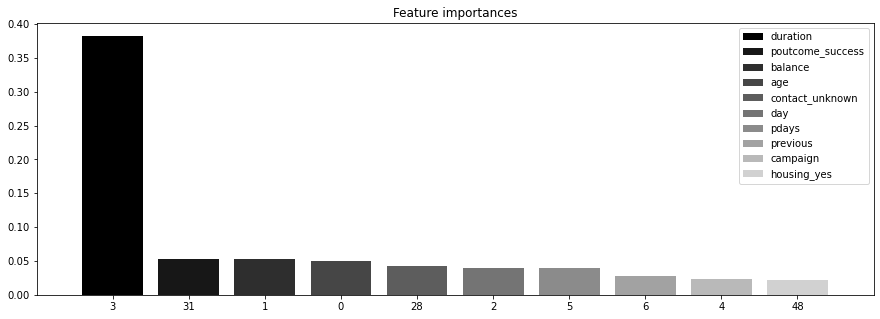

In [46]:

features = dict(zip(range(len(X.columns)), X.columns))

# Важность признаков
importances = tree_grid.best_estimator_.feature_importances_

indices = np.argsort(importances)[::-1]
# Plot the feature importancies of the forest
num_to_plot = min(10, len(X.columns))
feature_indices = [ind for ind in indices[:num_to_plot]]

# Print the feature ranking
print("Feature ranking:")

for f in range(num_to_plot):
    print(f+1, features[feature_indices[f]], importances[indices[f]])

plt.figure(figsize=(15,5))
plt.title("Feature importances")
bars = plt.bar(range(num_to_plot), 
               importances[indices[:num_to_plot]],
               color=([str(i/float(num_to_plot+1)) for i in range(num_to_plot)]),
               align="center")
ticks = plt.xticks(range(num_to_plot), 
                   feature_indices)
plt.xlim([-1, num_to_plot])
plt.legend(bars, [u''.join(features[i]) for i in feature_indices])
plt.show()


Самым влиятельным из параметров оказался max_depth.

**3 Случайный лес**

1 . Постройте  модель случайного леса ( Random Forest ) для вашей задачи с гиперпараметрами по умолчанию и оцените качество модели на отложенной выборке .

In [47]:
rf = RandomForestClassifier(n_estimators=100, random_state=2020)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_valid)

accuracy_score(y_valid, y_pred)

0.846521349656614

Доля правильных ответов получилась 0.8465. Теперь попробуем с максимальной глубиной, равной оптимальной глубине (max_depth) из прошлого задания

In [48]:
rf = RandomForestClassifier(n_estimators=100, random_state=2020, max_depth=4)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_valid)

accuracy_score(y_valid, y_pred)

0.7921767691848313

Тут доля правильных ответов получилась 0,7921, что еще меньше полученных ранее с Деревом Решений и меньше чем с параметром по умолчанию

2 . Осуществите подбор гиперпараметров модели :
• количество деревьев n_estimators ;
• максимальная глубина дерева max_depth ;
• минимальное числообъектов для разбиения во внутренней вершине min_samples_split;
• минимальное число объектов в листе min_samples_leaf;
• максимальное количество признако, рассматриваемых при поиске лучшего разбиения max_features 
3  Постройте валидационные кривые для каждого из гиперпараметров .

In [49]:
rf_params_n_estimators = {'n_estimators': np.arange(5, 100, 10)}
rf_n_estimators = RandomForestClassifier(random_state=2020)
rf_grid_n_estimators = GridSearchCV(rf_n_estimators, rf_params_n_estimators, cv=5, scoring='accuracy') 
rf_grid_n_estimators.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2020),
             param_grid={'n_estimators': array([ 5, 15, 25, 35, 45, 55, 65, 75, 85, 95])},
             scoring='accuracy')

In [50]:
print(rf_grid_n_estimators.best_score_)
print(rf_grid_n_estimators.best_params_)
print(rf_grid_n_estimators.best_estimator_)

0.8551141432436882
{'n_estimators': 95}
RandomForestClassifier(n_estimators=95, random_state=2020)


Text(0, 0.5, 'Mean accuracy on test set')

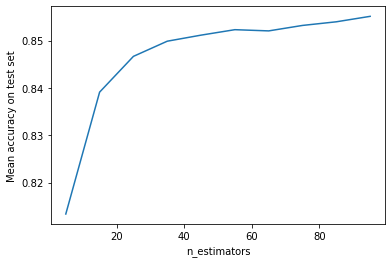

In [51]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(rf_params_n_estimators['n_estimators'], rf_grid_n_estimators.cv_results_['mean_test_score']) # accuracy vs max_depth
ax.set_xlabel('n_estimators')
ax.set_ylabel('Mean accuracy on test set')

Лучший n_estimators получили 95

In [52]:
rf_params_max_features = {'max_features': np.arange(5, 100, 10)}
rf_max_features = RandomForestClassifier(n_estimators=95, random_state=2020)
rf_grid_max_features = GridSearchCV(rf_max_features, rf_params_max_features, cv=5, scoring='accuracy')
rf_grid_max_features.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/conda/lib/python3.7/site-packages/jobli

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=95,
                                              random_state=2020),
             param_grid={'max_features': array([ 5, 15, 25, 35, 45, 55, 65, 75, 85, 95])},
             scoring='accuracy')

In [53]:
print(rf_grid_max_features.best_score_)
print(rf_grid_max_features.best_params_)
print(rf_grid_max_features.best_estimator_)

0.8569063072672058
{'max_features': 45}
RandomForestClassifier(max_features=45, n_estimators=95, random_state=2020)


Text(0, 0.5, 'Mean accuracy on test set')

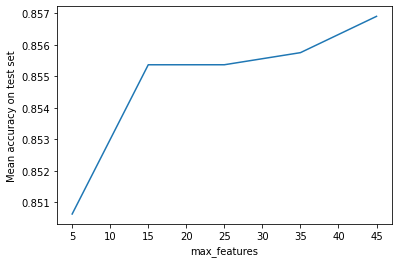

In [54]:
fig, ax = plt.subplots() 

ax.plot(rf_params_max_features['max_features'], rf_grid_max_features.cv_results_['mean_test_score']) # accuracy vs max_depth
ax.set_xlabel('max_features')
ax.set_ylabel('Mean accuracy on test set')

Лучшее значение max_features получили 45

In [55]:
rf_params_max_depth = {'max_depth': np.arange(2, 11)}
rf_max_depth = RandomForestClassifier(n_estimators=95, max_features=45, random_state=2020)
rf_grid_max_depth = GridSearchCV(rf_max_depth, rf_params_max_depth, cv=5, scoring='accuracy') 
rf_grid_max_depth.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_features=45, n_estimators=95,
                                              random_state=2020),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])},
             scoring='accuracy')

In [56]:
print(rf_grid_max_depth.best_score_)
print(rf_grid_max_depth.best_params_)
print(rf_grid_max_depth.best_estimator_)

0.8511461837973693
{'max_depth': 10}
RandomForestClassifier(max_depth=10, max_features=45, n_estimators=95,
                       random_state=2020)


Text(0, 0.5, 'Mean accuracy on test set')

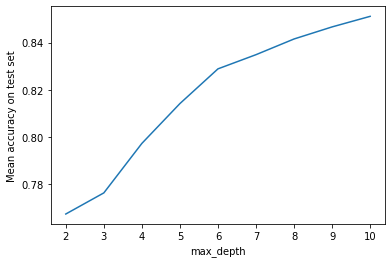

In [57]:
fig, ax = plt.subplots() 

ax.plot(rf_params_max_depth['max_depth'], rf_grid_max_depth.cv_results_['mean_test_score']) # accuracy vs max_depth
ax.set_xlabel('max_depth')
ax.set_ylabel('Mean accuracy on test set')

Лучшее значение max_depth= 10.

In [58]:
rf_params_min_samples_leaf = {'min_samples_leaf': np.arange(3, 10, 2)}
rf_min_samples_leaf = RandomForestClassifier(n_estimators=95, max_features=45, max_depth=10, random_state=22)
rf_grid_min_samples_leaf = GridSearchCV(rf_min_samples_leaf, rf_params_min_samples_leaf, cv=5, scoring='accuracy')
rf_grid_min_samples_leaf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=10, max_features=45,
                                              n_estimators=95,
                                              random_state=22),
             param_grid={'min_samples_leaf': array([3, 5, 7, 9])},
             scoring='accuracy')

In [59]:
print(rf_grid_min_samples_leaf.best_score_)
print(rf_grid_min_samples_leaf.best_params_)
print(rf_grid_min_samples_leaf.best_estimator_)

0.8490978559076204
{'min_samples_leaf': 3}
RandomForestClassifier(max_depth=10, max_features=45, min_samples_leaf=3,
                       n_estimators=95, random_state=22)


Text(0, 0.5, 'Mean accuracy on test set')

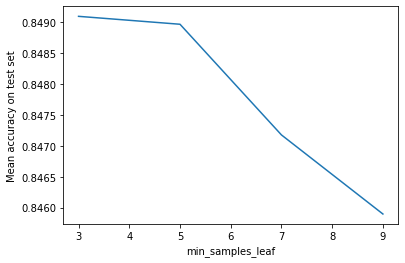

In [60]:
fig, ax = plt.subplots() 

ax.plot(rf_params_min_samples_leaf['min_samples_leaf'], rf_grid_min_samples_leaf.cv_results_['mean_test_score']) # accuracy vs max_depth
ax.set_xlabel('min_samples_leaf')
ax.set_ylabel('Mean accuracy on test set')

Лучшее значение min_samples_leaf = 3.

4 . Оцените важность признаков в данной модели. Визуализируйте топ - 10 самых полезных признаков с помощью столбчатой диаграммы.

In [61]:
rf_params = {'n_estimators': np.arange(165, 196, 10), 'max_depth': np.arange(6, 13)}
rf = RandomForestClassifier(random_state=22)
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)

print(rf_grid.best_score_)
print(rf_grid.best_params_)
#print(rf_grid.best_estimator_)

0.8506348391050075
{'max_depth': 12, 'n_estimators': 195}


Feature ranking:
1 duration 0.38250360861812094
2 poutcome_success 0.05281087738405824
3 balance 0.052262025893729164
4 age 0.050496053685824396
5 contact_unknown 0.04296544300677805
6 day 0.04030255756108947
7 pdays 0.0399759122600936
8 previous 0.027349285762291956
9 campaign 0.024074259718408892
10 housing_yes 0.022608225561915836


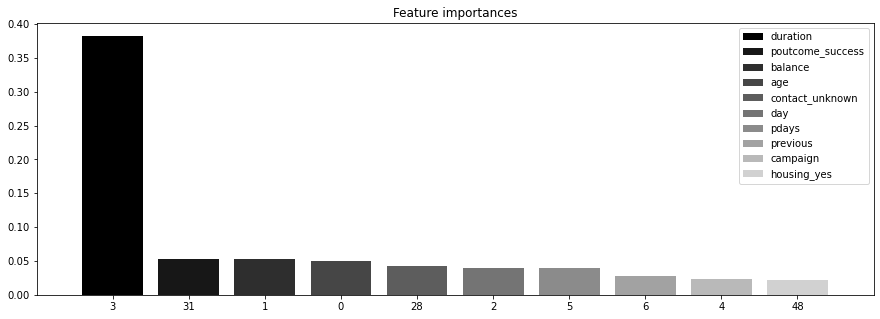

In [62]:
features = dict(zip(range(len(X.columns)), X.columns))

# Важность признаков
importances = rf_grid.best_estimator_.feature_importances_

indices = np.argsort(importances)[::-1]
# Plot the feature importancies of the forest
num_to_plot = min(10, len(X.columns))
feature_indices = [ind for ind in indices[:num_to_plot]]

# Print the feature ranking
print("Feature ranking:")

for f in range(num_to_plot):
    print(f+1, features[feature_indices[f]], importances[indices[f]])

plt.figure(figsize=(15,5))
plt.title("Feature importances")
bars = plt.bar(range(num_to_plot), 
               importances[indices[:num_to_plot]],
               color=([str(i/float(num_to_plot+1)) for i in range(num_to_plot)]),
               align="center")
ticks = plt.xticks(range(num_to_plot), 
                   feature_indices)
plt.xlim([-1, num_to_plot])
plt.legend(bars, [u''.join(features[i]) for i in feature_indices])
plt.show()


5 . Сравните результаты трёх моделей: метода ближайших соседей, дерева решений и случайного леса. Сформулируйте выводы .

1. Метод ближайших соседей оказался худшим среди всех и потратил больше всего времени на выполнение работы.
2. Дерево решений было достаточно быстрым. Справляется с задачами намного быстрее метода ближайших соседей.
3. Наилучшую точность показал случайный лес.